#TCGA Breast Cancer (BRCA)
##PREPROCESSING

##Import **Libraries** and **Dataset**


In [2]:
#Importing libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# The dataset was uploaded to drive
# Import data from drive
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except Exception as e:
    print("If you are working on your local machine this should not be a problem", e)

If you are working on your local machine this should not be a problem No module named 'google.colab'


In [4]:
# Importing data uploaded on drive or on local machine

path = '/content/drive/MyDrive/Datasets/final_Data_merged.csv'

try:
 clinical_df =  pd.read_csv(path,  sep=',', index_col='_INTEGRATION')
except FileNotFoundError:
    alternative_path  = '../data/no_processed_data/final_Data_merged.csv'
    try:
        clinical_df =  pd.read_csv(alternative_path,  sep=',', index_col='_INTEGRATION')
    except FileNotFoundError:
        print("Not found data")

In [ ]:

alternative_path  = '../data/no_processed_data/final_Data_merged.csv'
alternative_path_dfB  = '../data/processed_data/df1B.csv'
alternative_path_df1  = '../data/processed_data/df1.csv'
alternative_path_dfB_le  = '../data/label_encoder/final_dfB.csv'
alternative_path_df1_le  = '../data/label_encoder/final_df1.csv'
alternative_path_dfB_gd  = '../data/dummies/dataB.csv'
alternative_path_df_gd  = '../data/dummies/data.csv'

clinical_df =  pd.read_csv(alternative_path,  sep=',', index_col='_INTEGRATION')
dfB =  pd.read_csv(alternative_path_dfB,  sep=',', index_col='_INTEGRATION')
df1 =  pd.read_csv(alternative_path_df1,  sep=',', index_col='_INTEGRATION')
dfB_le =  pd.read_csv(alternative_path_dfB_le,  sep=',', index_col='_INTEGRATION')
df1_le =  pd.read_csv(alternative_path_df1_le,  sep=',', index_col='_INTEGRATION')
dfB_gd = pd.read_csv(alternative_path_dfB_gd,  sep=',', index_col='_INTEGRATION')
df1_gd = pd.read_csv(alternative_path_df_gd,  sep=',', index_col='_INTEGRATION')

##***Exploratory Analysis*** and **first preprocessing steps** (dropping some Features)

In [5]:
# Look at the shape of the dataset
print("Raw dataset shape:", clinical_df.shape)

# Look at the information of the dataset
print("Clinical set info", clinical_df.info())

Raw dataset shape: (1236, 202)
<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, TCGA-3C-AAAU-01 to TCGA-Z7-A8R6-01
Columns: 202 entries, AJCC_Stage_nature2012 to Redaction
dtypes: float64(40), int64(3), object(159)
memory usage: 1.9+ MB
Clinical set info None


In [5]:
# Printing the first 5 lines of the dataset
clinical_df.head()

AJCC_Stage_nature2012  \
_INTEGRATION                            
TCGA-3C-AAAU-01                   NaN   
TCGA-3C-AALI-01                   NaN   
TCGA-3C-AALJ-01                   NaN   
TCGA-3C-AALK-01                   NaN   
TCGA-4H-AAAK-01                   NaN   

                 Age_at_Initial_Pathologic_Diagnosis_nature2012  \
_INTEGRATION                                                      
TCGA-3C-AAAU-01                                             NaN   
TCGA-3C-AALI-01                                             NaN   
TCGA-3C-AALJ-01                                             NaN   
TCGA-3C-AALK-01                                             NaN   
TCGA-4H-AAAK-01                                             NaN   

                 CN_Clusters_nature2012 Converted_Stage_nature2012  \
_INTEGRATION                                                         
TCGA-3C-AAAU-01                     NaN                        NaN   
TCGA-3C-AALI-01                     NaN                        NaN   
TCGA-3C-AALJ-01                     NaN                        NaN   
TCGA-3C-AALK-01                     NaN                        NaN   
TCGA-4H-AAAK-01                     NaN                        NaN   

                 Days_to_Date_of_Last_Contact_nature2012  \
_INTEGRATION                                               
TCGA-3C-AAAU-01                                      NaN   
TCGA-3C-AALI-01                                      NaN   
TCGA-3C-AALJ-01                                      NaN   
TCGA-3C-AALK-01                                      NaN   
TCGA-4H-AAAK-01                                      NaN   

                 Days_to_date_of_Death_nature2012 ER_Status_nature2012  \
_INTEGRATION                                                             
TCGA-3C-AAAU-01                               NaN                  NaN   
TCGA-3C-AALI-01                               NaN                  NaN   
TCGA-3C-AALJ-01                               NaN                  NaN   
TCGA-3C-AALK-01                               NaN                  NaN   
TCGA-4H-AAAK-01                               NaN                  NaN   

                Gender_nature2012 HER2_Final_Status_nature2012  \
_INTEGRATION                                                     
TCGA-3C-AAAU-01               NaN                          NaN   
TCGA-3C-AALI-01               NaN                          NaN   
TCGA-3C-AALJ-01               NaN                          NaN   
TCGA-3C-AALK-01               NaN                          NaN   
TCGA-4H-AAAK-01               NaN                          NaN   

                 Integrated_Clusters_no_exp__nature2012  ...    _PATIENT_y  \
_INTEGRATION                                             ...                 
TCGA-3C-AAAU-01                                     NaN  ...  TCGA-3C-AAAU   
TCGA-3C-AALI-01                                     NaN  ...  TCGA-3C-AALI   
TCGA-3C-AALJ-01                                     NaN  ...  TCGA-3C-AALJ   
TCGA-3C-AALK-01                                     NaN  ...  TCGA-3C-AALK   
TCGA-4H-AAAK-01                                     NaN  ...  TCGA-4H-AAAK   

                 OS OS.time  DSS DSS.time  DFI  DFI.time  PFI PFI.time  \
_INTEGRATION                                                             
TCGA-3C-AAAU-01   0  4047.0  0.0   4047.0  1.0    1808.0    1   1808.0   
TCGA-3C-AALI-01   0  4005.0  0.0   4005.0  0.0    4005.0    0   4005.0   
TCGA-3C-AALJ-01   0  1474.0  0.0   1474.0  0.0    1474.0    0   1474.0   
TCGA-3C-AALK-01   0  1448.0  0.0   1448.0  NaN       NaN    0   1448.0   
TCGA-4H-AAAK-01   0   348.0  0.0    348.0  0.0     348.0    0    348.0   

                Redaction  
_INTEGRATION               
TCGA-3C-AAAU-01       NaN  
TCGA-3C-AALI-01       NaN  
TCGA-3C-AALJ-01       NaN  
TCGA-3C-AALK-01       NaN  
TCGA-4H-AAAK-01       NaN  

[5 rows x 202 columns]

In [6]:
# Look at missing values
print("Number of missing values per column")
print(clinical_df.isna().sum())
print('\n')
print("Total number of missing values in the dataset")
print(clinical_df.isna().sum().sum())

Number of missing values per column
AJCC_Stage_nature2012                              459
Age_at_Initial_Pathologic_Diagnosis_nature2012     288
CN_Clusters_nature2012                             463
Converted_Stage_nature2012                         447
Days_to_Date_of_Last_Contact_nature2012            357
                                                  ... 
DFI                                                181
DFI.time                                           182
PFI                                                  0
PFI.time                                             1
Redaction                                         1230
Length: 202, dtype: int64


Total number of missing values in the dataset
116480


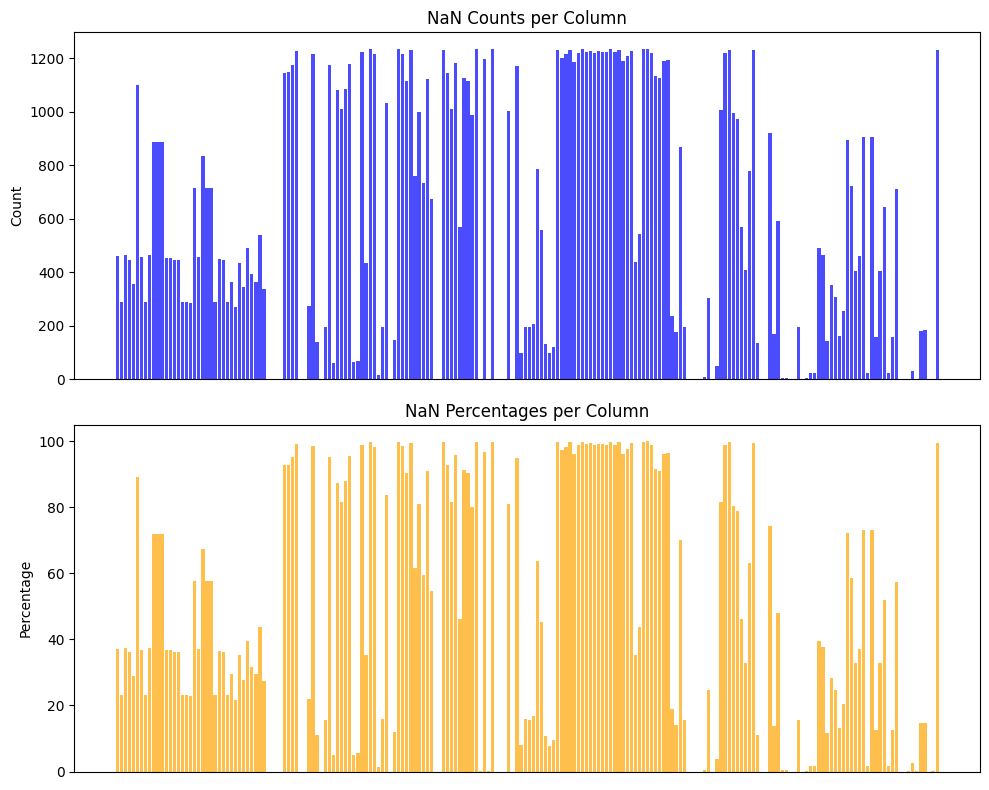

In [10]:
# There are 116480 total missing values
# We want to look at the distribution of missing values in each column of the dataset

# Create a function to calculate number of missing values:
def calculate_nan_statistics(df):
    # Calculate the percentage of NaN values per column
    nan_counts = df.isna().sum()
    nan_percentages = (nan_counts / len(df)) * 100

    # Create a new DataFrame with NaN counts and percentages
    nan_info = pd.DataFrame({
        'NaN Count': nan_counts,
        'NaN Percentage': nan_percentages
    })

    # Create a 'Rounded Percentage' column
    nan_info['Rounded Percentage'] = nan_info['NaN Percentage'].round(1)

    # Count the columns with more than 1, 10, 50, 75, 95% missing info
    perc_columns_missing_only1perc_info = ((nan_info['Rounded Percentage'].value_counts() <= 1).sum()/ len(df)) * 100
    perc_columns_missing_only15perc_info = ((nan_info['Rounded Percentage'].value_counts() <= 15).sum()/ len(df)) * 100
    perc_columns_missing_almost25per_info = ((nan_info['Rounded Percentage'].value_counts() <= 25).sum()/ len(df)) * 100
    perc_columns_missing_morethan75perc_info = ((nan_info['Rounded Percentage'].value_counts() <= 75).sum()/ len(df)) * 100
    perc_columns_missing_morethan90perc_info = ((nan_info['Rounded Percentage'].value_counts() <= 95).sum()/ len(df)) * 100

    # Create separate bar plots for NaN counts and percentages
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Bar plot for NaN counts
    axes[0].bar(nan_info.index, nan_info['NaN Count'], color='blue', alpha=0.7)
    axes[0].set_title('NaN Counts per Column')
    axes[0].set_ylabel('Count')
    axes[0].set_xticks([])  # Hide x-axis labels

    # Bar plot for NaN percentages
    axes[1].bar(nan_info.index, nan_info['NaN Percentage'], color='orange', alpha=0.7)
    axes[1].set_title('NaN Percentages per Column')
    axes[1].set_ylabel('Percentage')
    axes[1].set_xticks([])  # Hide x-axis labels

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

    return {
        'nan_info': nan_info,
        'perc_columns_missing_only1perc_info': perc_columns_missing_only1perc_info,
        'perc_columns_missing_only15perc_info': perc_columns_missing_only15perc_info,
        'perc_columns_missing_almost25per_info': perc_columns_missing_almost25per_info,
        'perc_columns_missing_morethan75perc_info': perc_columns_missing_morethan75perc_info,
        'perc_columns_missing_morethan90perc_info': perc_columns_missing_morethan90perc_info
    }

Statistics_clinical = calculate_nan_statistics(clinical_df)

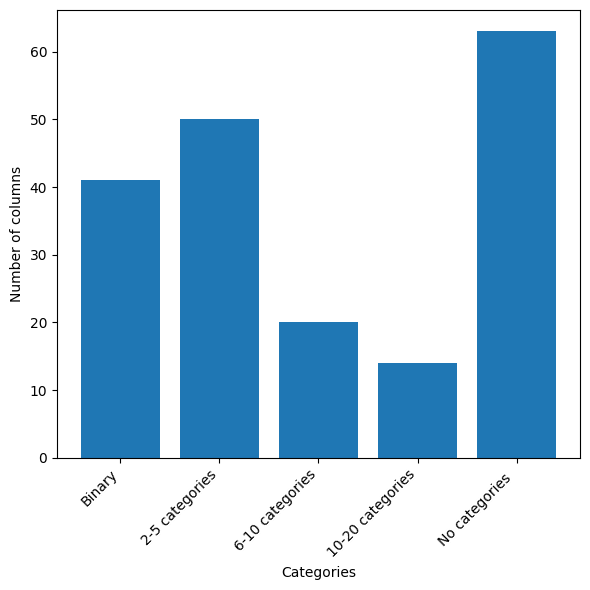

In [8]:
# Looking at the number of features in categorical columns
def categorize_unique_values(data):
    # Create a dictionary to store category counts
    category_count = {
        'Binary': 0,
        '2-5 categories': 0,
        '6-10 categories': 0,
        '10-20 categories': 0,
        'No categories ': 0
    }
    # Iterate on every column
    for column in data.columns:
        # Count unique values in every column
        unique_values_count = data[column].nunique()

        if unique_values_count == 2:
            category_count['Binary'] += 1
        elif 2 < unique_values_count <= 5:
            category_count['2-5 categories'] += 1
        elif 6 <= unique_values_count <= 10:
            category_count['6-10 categories'] += 1
        elif 11 <= unique_values_count <= 20:
            category_count['10-20 categories'] += 1
        elif unique_values_count > 20:
            category_count['No categories '] += 1
    return category_count

category_count = categorize_unique_values(clinical_df)

# Create bargraph
plt.figure(figsize=(6, 6))
plt.bar(category_count.keys(), category_count.values())

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of columns')

# Show the graph
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Start Preprocessing
# First start by removing columns that have information about patient / sample ids / the cohort / etc..

to_drop = ['system_version', 'vial_number',  'patient_id', 'bcr_patient_barcode', 'form_completion_date', 'bcr_sample_barcode', 'bcr_followup_barcode', 'form_completion_date',
           'pathology_report_file_name', '_PATIENT_y', '_PATIENT_x','sample_type_id']
clinical_df = clinical_df.drop(to_drop, axis=1)

In [10]:
# Because columns containing one value do not provide any meaning information to the dataset, we decided to delete them
# Remove columns with unique values = 1:
to_drop=[]
for column in clinical_df:
  if clinical_df[column].nunique() == 1:
    to_drop.append(column)

print("Columns with only one unique value:", to_drop)

# Dropping the not unique columns
clinical_df = clinical_df.drop(columns=to_drop, axis=1)

Columns with only one unique value: ['_cohort', '_primary_disease', '_primary_site', 'additional_surgery_metastatic_procedure', 'days_to_initial_pathologic_diagnosis', 'disease_code', 'informed_consent_verified', 'is_ffpe', 'metastatic_breast_carcinoma_lab_proc_hr2_n_n_st_hybrdztn_tcm_typ', 'metastatic_breast_carcinoma_pos_finding_hr2_rbb2_thr_msr_scl_txt', 'mtsttc_brst_crcnm_hr2_rbb_ps_fndng_flrscnc_n_st_hybrdztn_clcltn', 'project_code', 'tumor_tissue_site', 'Redaction']


In [11]:
# According to the exploratory figure above we decided on 50% as a threshold for misisng values percentage

# Remove columns with missing values => 50 %:
missing = clinical_df.isna().sum()
missing_perc = (missing/len(clinical_df))*100
to_drop = missing_perc[missing_perc>= 50].index
clinical_df = clinical_df.drop(to_drop, axis=1)

In [12]:
# Checking shape after:
print("Shape the data frame after initial preprocessing:", clinical_df.shape)

Shape the data frame after initial preprocessing: (1236, 98)


In [13]:
"""When looking at the column names in the dataset,
we noticed that some columns have similar namings and
might therefore hold some redundant information,
we want to confirm that"""

# Checking Redundancy:

# Defining Function that looks at common proportion between two columns
def calculate_common_proportion(col1, col2):
    total_filas = max(len(col1)-col1.isna().sum(), len(col2)-col2.isna().sum())
    total_comun = sum((col1 == col2) & (~col1.isna()) & (~col2.isna()))
    return total_comun / total_filas
# Filter redundant data for the potential target variable "OS"
surv_columns = ['sample', '_PATIENT', 'OS', 'OS.time', 'DSS', 'DSS.time']

columns = clinical_df.columns
columns_to_drop = [] ## create list of columns to drop

# Iterate through column list and filtering columns with high similarity in values
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = clinical_df[columns[i]]
        col2 = clinical_df[columns[j]]
        if (columns[i] not in surv_columns) and (columns[j] not in surv_columns):
            common_proportion = calculate_common_proportion(col1, col2)
            if common_proportion  > 0.95:
                print(f"Columns {columns[i]} and {columns[j]} share {common_proportion *100}% in common ")
# Retain one with lower percentage of missing values
                nan_count_col1 = col1.isna().sum()
                nan_count_col2 = col2.isna().sum()
                if nan_count_col1 > nan_count_col2:
                    columns_to_drop.append(columns[i])
                    print("Will remove column", columns[i], "due to higher NaN count")
                else:
                    columns_to_drop.append(columns[j])
                    print("Will remove column", columns[j], "due to higher NaN count")

# Displaying the columns
#print("Columns with high similarity:", columns_to_drop)

# Drop columns:
df_filtered_1 = clinical_df.drop(columns=columns_to_drop, axis=1)
# Display shape of df_filtered_1
print("Data shape:", df_filtered_1.shape)

Columns icd_10 and icd_o_3_site share 99.91909385113269% in common 
Will remove column icd_o_3_site due to higher NaN count


Columns _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_exon and _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_PANCAN share 100.0% in common 
Will remove column _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_PANCAN due to higher NaN count
Columns _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_exon and _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile share 100.0% in common 
Will remove column _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile due to higher NaN count
Columns _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_exon and _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2 share 100.0% in common 
Will remove column _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2 due to higher NaN count
Columns _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_PANCAN and _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile share 100.0% in common 
Will remove column _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile due to higher NaN count
Columns _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_PANCAN and _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2 share 100.0% in common 
Will remove column _GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2 due to higher NaN count
Columns 

In [14]:
""" We decided to further have a look at columns with 75% similarity just to confirm visually that redundant looking columns are removed"""

# Visualizing columns with 75% similarity
columns = df_filtered_1.columns
# Iterate through column list and filtering columns with high similarity in values
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = df_filtered_1[columns[i]]
        col2 = df_filtered_1[columns[j]]
        if (columns[i] not in surv_columns) and (columns[j] not in surv_columns):
            common_proportion = calculate_common_proportion(col1, col2)
            if (common_proportion>0.75) & (common_proportion<0.95) :
                print(f"Columns {columns[i]} and {columns[j]} share {common_proportion *100}% in common ")

Columns Age_at_Initial_Pathologic_Diagnosis_nature2012 and age_at_initial_pathologic_diagnosis share 76.61812297734627% in common 


Columns Days_to_Date_of_Last_Contact_nature2012 and OS_Time_nature2012 share 90.50632911392405% in common 
Columns ER_Status_nature2012 and PR_Status_nature2012 share 86.02564102564104% in common 
Columns Gender_nature2012 and gender share 76.61812297734627% in common 
Columns HER2_Final_Status_nature2012 and Metastasis_Coded_nature2012 share 81.09833971902938% in common 
Columns breast_carcinoma_estrogen_receptor_status and breast_carcinoma_progesterone_receptor_status share 85.95744680851064% in common 
Columns days_to_last_followup and DFI.time share 83.19559228650138% in common 
Columns days_to_last_followup and PFI.time share 78.70445344129556% in common 
Columns history_of_neoadjuvant_treatment and other_dx share 94.1747572815534% in common 
Columns _GENOMIC_ID_TCGA_BRCA_mutation_curated_wustl_gene and _GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene share 76.78207739307535% in common 
Columns DFI and PFI share 84.54692556634305% in common 
Columns DFI.time and PFI.time share 84.5344129

In [15]:
# Depending on the results from the 75% similarity, we saw a need to compare manually some columns
col1 = df_filtered_1['ER_Status_nature2012']
col2 = df_filtered_1['PR_Status_nature2012']
for indice, (valor1, valor2) in enumerate(zip(col1, col2)):
    if valor1 != valor2 and (not pd.isna(valor1) and not pd.isna(valor2)):
        print(f"in row {indice},values differ:")
        print(f"Value1: {valor1}, Value2: {valor2}")
nan_count_col1 = col1.isna().sum()
nan_count_col2 = col2.isna().sum()

in row 8,values differ:
Value1: Positive, Value2: Negative
in row 13,values differ:
Value1: Negative, Value2: Positive
in row 17,values differ:
Value1: Positive, Value2: Negative
in row 40,values differ:
Value1: Positive, Value2: Negative
in row 44,values differ:
Value1: Positive, Value2: Negative
in row 64,values differ:
Value1: Positive, Value2: Negative
in row 68,values differ:
Value1: Positive, Value2: Negative
in row 82,values differ:
Value1: Positive, Value2: Negative
in row 86,values differ:
Value1: Positive, Value2: Negative
in row 87,values differ:
Value1: Positive, Value2: Negative
in row 90,values differ:
Value1: Positive, Value2: Negative
in row 92,values differ:
Value1: Positive, Value2: Negative
in row 103,values differ:
Value1: Positive, Value2: Negative
in row 105,values differ:
Value1: Negative, Value2: Positive
in row 127,values differ:
Value1: Positive, Value2: Negative
in row 131,values differ:
Value1: Positive, Value2: Negative
in row 136,values differ:
Value1: Pos

In [16]:
# Manually checking similarities between gender and Gender_nature2012 columns
col1 = df_filtered_1['gender']
col2 = df_filtered_1['Gender_nature2012']
for indice, (valor1, valor2) in enumerate(zip(col1, col2)):
    if valor1 != valor2 and (not pd.isna(valor1) and not pd.isna(valor2)):
        print(f"in row {indice},values differ:")
        print(f"Value1: {valor1}, Value2: {valor2}")
nan_count_col1 = col1.isna().sum()
nan_count_col2 = col2.isna().sum()

in row 916,values differ:
Value1: MALE, Value2: FEMALE


In [17]:
# Manually checking Columns Age_at_Initial_Pathologic_Diagnosis_nature2012 and age_at_initial_pathologic_diagnosis
col1 = df_filtered_1['age_at_initial_pathologic_diagnosis']
col2 = df_filtered_1['Age_at_Initial_Pathologic_Diagnosis_nature2012']
for indice, (valor1, valor2) in enumerate(zip(col1, col2)):
    if valor1 != valor2 and (not pd.isna(valor1) and not pd.isna(valor2)):
        print(f"in row {indice},values differ:")
        print(f"Value1: {valor1}, Value2: {valor2}")
nan_count_col1 = col1.isna().sum()
nan_count_col2 = col2.isna().sum()

in row 508,values differ:
Value1: 40.0, Value2: 49.0


In [18]:
""" From the manual comparision we recognized 2 extra columns to contain redundant information"""

# Removing the columns found to be redundant
df_filtered = df_filtered_1.drop(['Age_at_Initial_Pathologic_Diagnosis_nature2012', 'Gender_nature2012'], axis=1)

# Printing the new shape
print("The shape of the dataset after further preprocessing:", df_filtered.shape)

The shape of the dataset after further preprocessing: (1236, 88)


Now we look at rows with missing values.                                    
Here we take two approaches:
1. Delete rows with >50% missing values - df_1

2. Delete rows with > median missing values - df_B

In [19]:
# Approach 1:

# Compute the percentage of missing values for each sample/ row
missing_percentage = (df_filtered.isnull().sum(axis=1) / len(df_filtered.columns)) * 100

# Sort the missing percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Filter out samples where the missing percentage is greater than 50%
to_drop = missing_percentage_sorted[missing_percentage_sorted > 50]

#df_1 = df_filtered.drop(to_drop.index, axis=0)
df_1 = df_filtered.drop(to_drop.index, axis=0)
print("Shape of the dataframe after approach 1:", df_1.shape)

Shape of the dataframe after approach 1: (1226, 88)


In [20]:
# Approach 2:

# Compute the percentage of missing values for each sample/ row
missing_percentage = (df_filtered.isnull().sum(axis=1) / len(df_filtered.columns)) * 100

# Sort the missing percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# calculate median
median_missing = missing_percentage_sorted.median()
print("The value of the median is:", median_missing)

# Filter out samples where the missing percentage is greater than 50%
drop_this = missing_percentage_sorted[missing_percentage_sorted > median_missing]

df_B = df_filtered.drop(drop_this.index, axis=0)

print("Shape of the dataframe after approach 2:", df_B.shape)

The value of the median is: 11.363636363636363
Shape of the dataframe after approach 2: (632, 88)


In [21]:
"""With setting the threshold as median, the number of deleted rows was higher at an evident level.
One concern is whether this affects the unique features found within one column.
This will be then later checked and addressed as we further explore the dataset.
Here we only show one example"""

# Checking the number of unique values for a column in each dataset
print("Number of unique values of sample type in df is:", df_1['sample_type'].nunique())
print("Number of unique values of sample type in df_B is:", df_B['sample_type'].nunique())

Number of unique values of sample type in df is: 3
Number of unique values of sample type in df_B is: 1


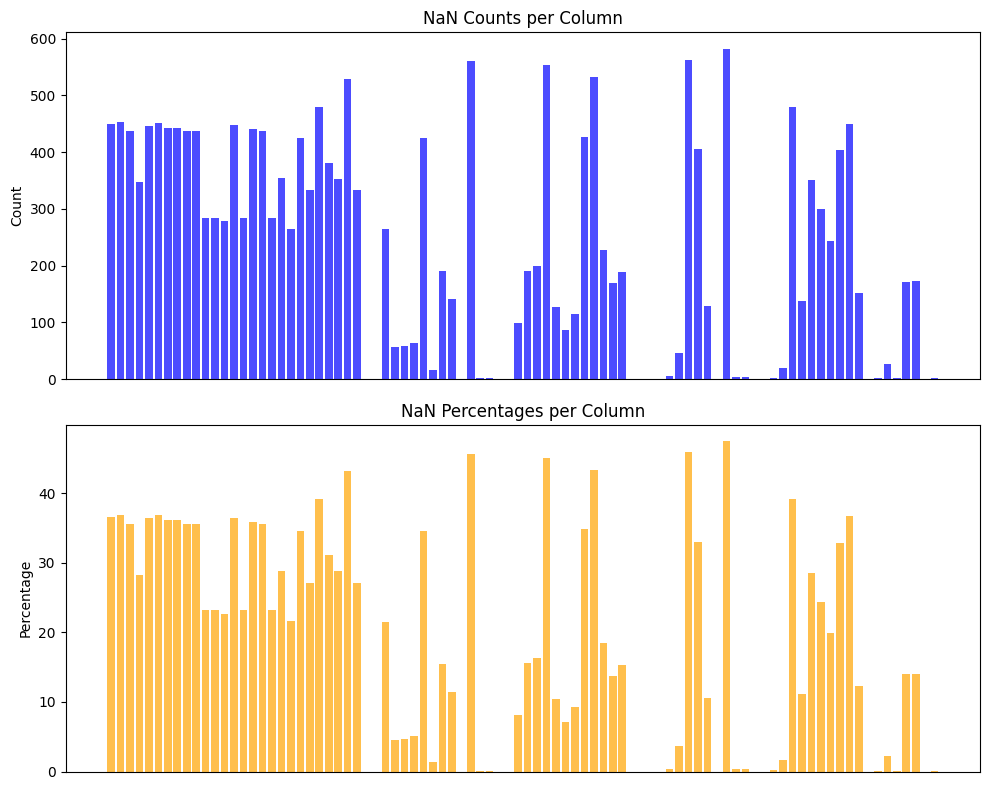

In [22]:
# Check the NaN total for df after preprocessing steps:
Statistics_df = calculate_nan_statistics(df_1)

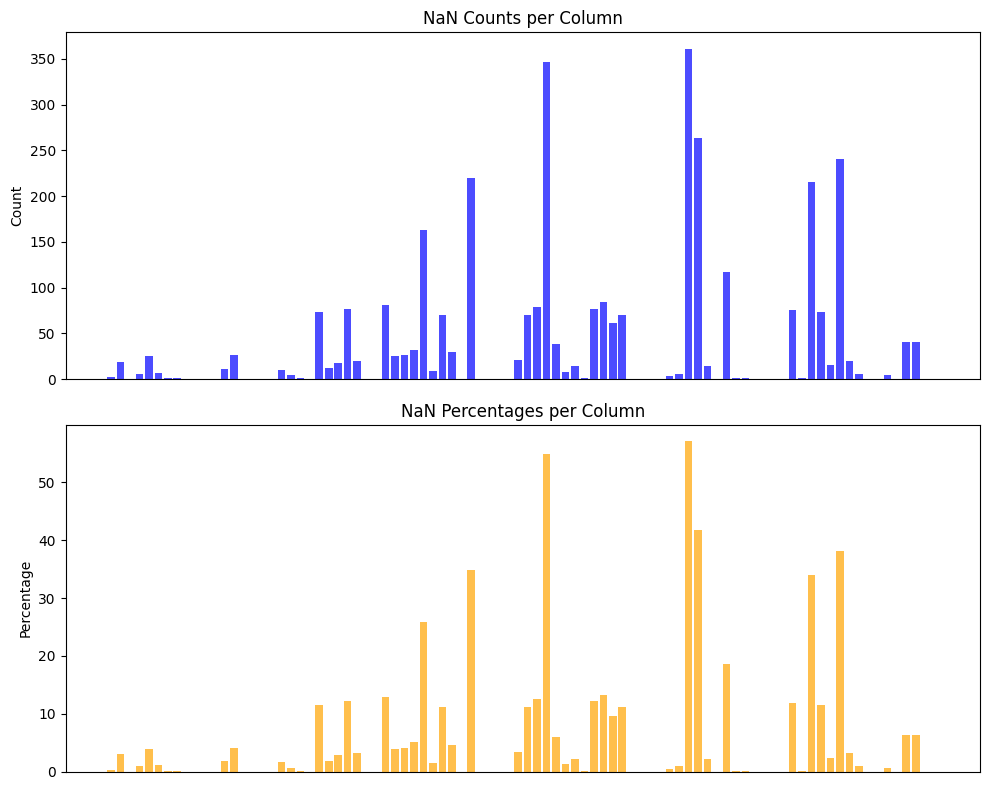

In [23]:
# Check the NaN total for df_B after preprocessing steps:
Statistics_df_B = calculate_nan_statistics(df_B)

In [24]:
print (df_B.index)

print("Final shape of the dataframes df and df_B respectively", df_1.shape, df_B.shape)

Index(['TCGA-A1-A0SF-01', 'TCGA-A1-A0SH-01', 'TCGA-A1-A0SJ-01',
       'TCGA-A1-A0SN-01', 'TCGA-A1-A0SO-01', 'TCGA-A1-A0SQ-01',
       'TCGA-A2-A04N-01', 'TCGA-A2-A04P-01', 'TCGA-A2-A04Q-01',
       'TCGA-A2-A04R-01',
       ...
       'TCGA-EW-A1P5-01', 'TCGA-EW-A1P6-01', 'TCGA-EW-A1P7-01',
       'TCGA-EW-A1P8-01', 'TCGA-EW-A1PA-01', 'TCGA-EW-A1PB-01',
       'TCGA-EW-A1PD-01', 'TCGA-EW-A1PE-01', 'TCGA-EW-A1PG-01',
       'TCGA-EW-A1PH-01'],
      dtype='object', name='_INTEGRATION', length=632)
Final shape of the dataframes df and df_B respectively (1226, 88) (632, 88)


Still, after deleting columns, rows. Many missing values still exist.
For this, we need to fill the missing values with appropriate values.
One idea was to fill with mean or mode. However, this is not very accurate.
Another idea we had was to fill the missing values using the Random Forest Imputer which is more accurate.

##ENCODING DATA WITH LABELENCODER

In [25]:
# Label encoder is used before Random Forest imputer as the imputer can not be used on categorical data

# Create a Copy of each dataset
df1 = df_1.copy()
dfB = df_B.copy()
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

categorical_df1 = df1.select_dtypes(include='object')
categorical_dfB = dfB.select_dtypes(include='object')
# Select columns of dtype 'object'
categorical_columns_df1 = categorical_df1.columns
categorical_columns_dfB = categorical_dfB.columns

# Apply LabelEncoder to each categorical column in df1
for col in categorical_columns_df1:
    df1.loc[df1[col].notnull(), col] = label_encoder.fit_transform(df1.loc[df1[col].notnull(), col]).astype('int')

# Apply LabelEncoder to each categorical column in df_B
for col in categorical_columns_dfB:
    dfB.loc[df1[col].notnull(), col] = label_encoder.fit_transform(dfB.loc[dfB[col].notnull(), col]).astype('int')

##**FILL** OUT DATA WITH **imputing** algorithm

In [26]:
# Filling the missing values using a machine learning imputing algorithm

# Start by importing necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the IterativeImputer class with RandomForestRegressor as the estimator
# max_iter specifies the maximum number of imputation iterations to perform
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10)

# Imputing missing values in the DataFrame 'clinical_trial_treatment_data'
# by fitting the imputer to the data and transforming it
dfB_imputed = imputer.fit_transform(dfB).round(decimals=0)

# Converting the imputed data, which is returned as a NumPy array, back to a DataFrame
# using the original column names from 'clinical_trial_treatment_data'
dfB_imputed = pd.DataFrame(dfB_imputed, columns=dfB.columns)

# Checking if there are any remaining missing values in the imputed DataFrame
# and printing the sum of missing values for each column
dfB_imputed.isna().sum()

c:\Users\CSO_c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


AJCC_Stage_nature2012                      0
CN_Clusters_nature2012                     0
Converted_Stage_nature2012                 0
Days_to_Date_of_Last_Contact_nature2012    0
ER_Status_nature2012                       0
                                          ..
DSS.time                                   0
DFI                                        0
DFI.time                                   0
PFI                                        0
PFI.time                                   0
Length: 88, dtype: int64

In [27]:
#Setting back the Index from the imputed data from the original data

dfB_imputed.index  = dfB.index

In [28]:
# For df1


# Importing necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the IterativeImputer class with RandomForestRegressor as the estimator
# max_iter specifies the maximum number of imputation iterations to perform
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10)

# Imputing missing values in the DataFrame 'clinical_trial_treatment_data'
# by fitting the imputer to the data and transforming it
df1_imputed = imputer.fit_transform(df1).round(decimals=0)

# Converting the imputed data, which is returned as a NumPy array, back to a DataFrame
# using the original column names from 'clinical_trial_treatment_data'
df1_imputed = pd.DataFrame(df1_imputed, columns=df1.columns)

# Checking if there are any remaining missing values in the imputed DataFrame
# and printing the sum of missing values for each column
df1_imputed.isna().sum()

c:\Users\CSO_c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


AJCC_Stage_nature2012                      0
CN_Clusters_nature2012                     0
Converted_Stage_nature2012                 0
Days_to_Date_of_Last_Contact_nature2012    0
ER_Status_nature2012                       0
                                          ..
DSS.time                                   0
DFI                                        0
DFI.time                                   0
PFI                                        0
PFI.time                                   0
Length: 88, dtype: int64

In [29]:
#Setting back the Index from the imputed data from the original data
df1_imputed.index  = df1.index

##SAVE DATA

In [30]:
# Save dataframes
try:
# Saving dfB to a CSV file in processed data folder if it exists
  dfB_imputed.to_csv('../data/processed_data/dfB_complete.csv')
# Otherwise save to same directory work is getting done at
except Exception as e:
  dfB_imputed.to_csv('dfB_complete.csv')

try:
# Saving df1 to a CSV file in processed data folder if it exists
  df1_imputed.to_csv('../data/processed_data/df1.csv')
# Otherwise save to same directory work is getting done at
except Exception as e:
  df1_imputed.to_csv('df1.csv')


##READ DATA AFTER IMPUTION

In [31]:
# Assigning a path for each dataframe
path_1 = '/content/drive/MyDrive/Datasets/df1.csv'
path_2 = "/content/drive/MyDrive/Datasets/dfB_complete.csv"

try:
    df1 = pd.read_csv(path_1, index_col='_INTEGRATION')
except FileNotFoundError:
    alternative_path  = '../data/processed_data/df1.csv'
    df1 = pd.read_csv(alternative_path, index_col='_INTEGRATION')

try:
    dfB = pd.read_csv(path_2, index_col='_INTEGRATION')
except FileNotFoundError:
    alternative_path  = '../data/processed_data/dfB_complete.csv'
    dfB = pd.read_csv(alternative_path, index_col='_INTEGRATION')

# Pring shape of dataframes
print("Shape of df1 and dfB post and pre-saving:")
df1.shape,dfB.shape,df_1.shape, df_B.shape

Shape of df1 and dfB post and pre-saving:


((1226, 88), (632, 88), (1226, 88), (632, 88))

In [32]:
# Checking the first few rows in dataframe before saving
print ("DF1 before saving\n", df_1.head(5))
print ()
print ("DFB before saving\n", df_B.head(5))

DF1 before saving
                 AJCC_Stage_nature2012  CN_Clusters_nature2012  \
_INTEGRATION                                                    
TCGA-3C-AAAU-01                   NaN                     NaN   
TCGA-3C-AALI-01                   NaN                     NaN   
TCGA-3C-AALJ-01                   NaN                     NaN   
TCGA-3C-AALK-01                   NaN                     NaN   
TCGA-4H-AAAK-01                   NaN                     NaN   

                Converted_Stage_nature2012  \
_INTEGRATION                                 
TCGA-3C-AAAU-01                        NaN   
TCGA-3C-AALI-01                        NaN   
TCGA-3C-AALJ-01                        NaN   
TCGA-3C-AALK-01                        NaN   
TCGA-4H-AAAK-01                        NaN   

                 Days_to_Date_of_Last_Contact_nature2012 ER_Status_nature2012  \
_INTEGRATION                                                                    
TCGA-3C-AAAU-01                         

In [33]:
# Checking the first few rows in dataframe after saving
print ("DF1 post saving\n", df1.head(5))
print ()
print ("DFB post saving\n", dfB.head(5))

DF1 post saving
                  AJCC_Stage_nature2012  CN_Clusters_nature2012  \
_INTEGRATION                                                     
TCGA-3C-AAAU-01                   10.0                     3.0   
TCGA-3C-AALI-01                    4.0                     3.0   
TCGA-3C-AALJ-01                    5.0                     3.0   
TCGA-3C-AALK-01                    1.0                     3.0   
TCGA-4H-AAAK-01                    7.0                     2.0   

                 Converted_Stage_nature2012  \
_INTEGRATION                                  
TCGA-3C-AAAU-01                         3.0   
TCGA-3C-AALI-01                         3.0   
TCGA-3C-AALJ-01                         4.0   
TCGA-3C-AALK-01                         2.0   
TCGA-4H-AAAK-01                         4.0   

                 Days_to_Date_of_Last_Contact_nature2012  \
_INTEGRATION                                               
TCGA-3C-AAAU-01                                   2821.0   
TCGA-3C-AA

In [34]:
# Drop Unnamed: 0 columns
try:
    df1.drop('Unnamed: 0', axis=1, inplace=True)
    dfB.drop('Unnamed: 0', axis=1, inplace=True)
except Exception as e:
    print(e)

"['Unnamed: 0'] not found in axis"


In [35]:
""" In the vital_status column we saved 0 as DECEASED and 1 as LIVING, we want to switch it"""

# Consider 0 as LIVING and 1 as DECEASED
df1.vital_status.replace([0, 1], [1, 0], inplace=True)

df1.vital_status.value_counts, dfB.vital_status.value_counts

dfB.vital_status.replace([0, 1], [1, 0], inplace=True)

dfB.vital_status.value_counts, dfB.vital_status.value_counts

C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\2540638753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.vital_status.replace([0, 1], [1, 0], inplace=True)
C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\2540638753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

(<bound method IndexOpsMixin.value_counts of _INTEGRATION
 TCGA-A1-A0SF-01    0.0
 TCGA-A1-A0SH-01    0.0
 TCGA-A1-A0SJ-01    0.0
 TCGA-A1-A0SN-01    0.0
 TCGA-A1-A0SO-01    0.0
                   ... 
 TCGA-EW-A1PB-01    0.0
 TCGA-EW-A1PD-01    0.0
 TCGA-EW-A1PE-01    0.0
 TCGA-EW-A1PG-01    0.0
 TCGA-EW-A1PH-01    0.0
 Name: vital_status, Length: 632, dtype: float64>,
 <bound method IndexOpsMixin.value_counts of _INTEGRATION
 TCGA-A1-A0SF-01    0.0
 TCGA-A1-A0SH-01    0.0
 TCGA-A1-A0SJ-01    0.0
 TCGA-A1-A0SN-01    0.0
 TCGA-A1-A0SO-01    0.0
                   ... 
 TCGA-EW-A1PB-01    0.0
 TCGA-EW-A1PD-01    0.0
 TCGA-EW-A1PE-01    0.0
 TCGA-EW-A1PG-01    0.0
 TCGA-EW-A1PH-01    0.0
 Name: vital_status, Length: 632, dtype: float64>)

##**Dataframe Visualization after preprocessing**

C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\2973688911.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ddf['PAM50Call_RNAseq'].replace([2,3,0,4,1],['LumA', 'LumB', 'Basal','Normal', 'Her2'], inplace=True)


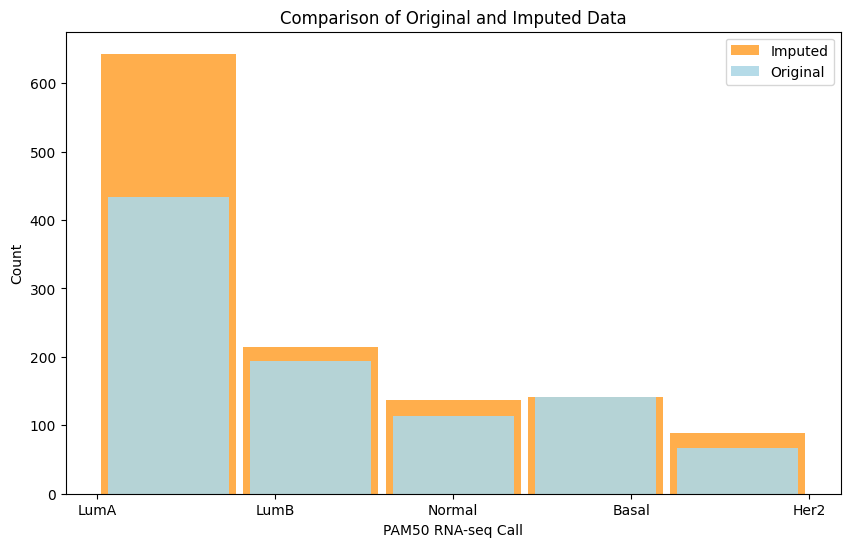

In [36]:
import matplotlib.pyplot as plt

# Our original dataframe with missing values is df
# Our dataframe after imputation is df1

ddf = df1.copy()
ddf['PAM50Call_RNAseq'].replace([2,3,0,4,1],['LumA', 'LumB', 'Basal','Normal', 'Her2'], inplace=True)

# Count the unique categories for binning the histograms
bin_i = ddf['PAM50Call_RNAseq'].nunique()
bin_o = df_1['PAM50Call_RNAseq'].nunique()

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for imputed data
plt.hist(ddf['PAM50Call_RNAseq'], bins=bin_i, alpha=0.7, label='Imputed', color='darkorange', rwidth=.95, align='mid')

# Histogram for original data without missing values
plt.hist(df_1['PAM50Call_RNAseq'].dropna(), bins=bin_o, alpha=0.9, label='Original', color='lightblue', rwidth=.85, align='mid')

# Adding labels and title
plt.xlabel('PAM50 RNA-seq Call')
plt.ylabel('Count')
plt.title('Comparison of Original and Imputed Data')
plt.legend()

# Display the plot
plt.show()


C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\3332966528.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ddfB['PAM50Call_RNAseq'].replace([2,3,0,4,1],['LumA', 'LumB', 'Basal','Normal', 'Her2'], inplace=True)


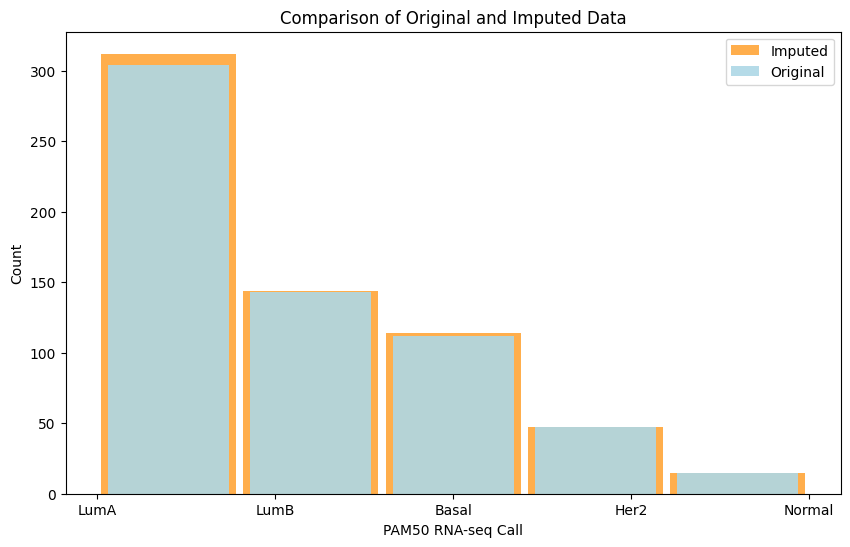

In [37]:
import matplotlib.pyplot as plt

# Our original dataframe with missing values is df_B
# Our dataframe after imputation is dfB

ddfB = dfB.copy()
ddfB['PAM50Call_RNAseq'].replace([2,3,0,4,1],['LumA', 'LumB', 'Basal','Normal', 'Her2'], inplace=True)

# Count the unique categories for binning the histograms
bin_i = ddfB['PAM50Call_RNAseq'].nunique()
bin_o = df_B['PAM50Call_RNAseq'].nunique()

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for imputed data
plt.hist(ddfB['PAM50Call_RNAseq'], bins=bin_i, alpha=0.7, label='Imputed', color='darkorange', rwidth=.95, align='mid')

# Histogram for original data without missing values
plt.hist(df_B['PAM50Call_RNAseq'].dropna(), bins=bin_o, alpha=0.9, label='Original', color='lightblue', rwidth=.85, align='mid')

# Adding labels and title
plt.xlabel('PAM50 RNA-seq Call')
plt.ylabel('Count')
plt.title('Comparison of Original and Imputed Data')
plt.legend()

# Display the plot
plt.show()


In [38]:
# Count the occurrences of each unique value in the 'PAM50Call_RNAseq' column for the original dataset 'df1'
print(df1.PAM50Call_RNAseq.value_counts())

# Count the occurrences of each unique value in the 'PAM50Call_RNAseq' column for the modified dataset 'df'
print(df_1.PAM50Call_RNAseq.value_counts())

PAM50Call_RNAseq
2.0    643
3.0    215
0.0    142
4.0    137
1.0     89
Name: count, dtype: int64
PAM50Call_RNAseq
LumA      433
LumB      194
Basal     141
Normal    113
Her2       67
Name: count, dtype: int64


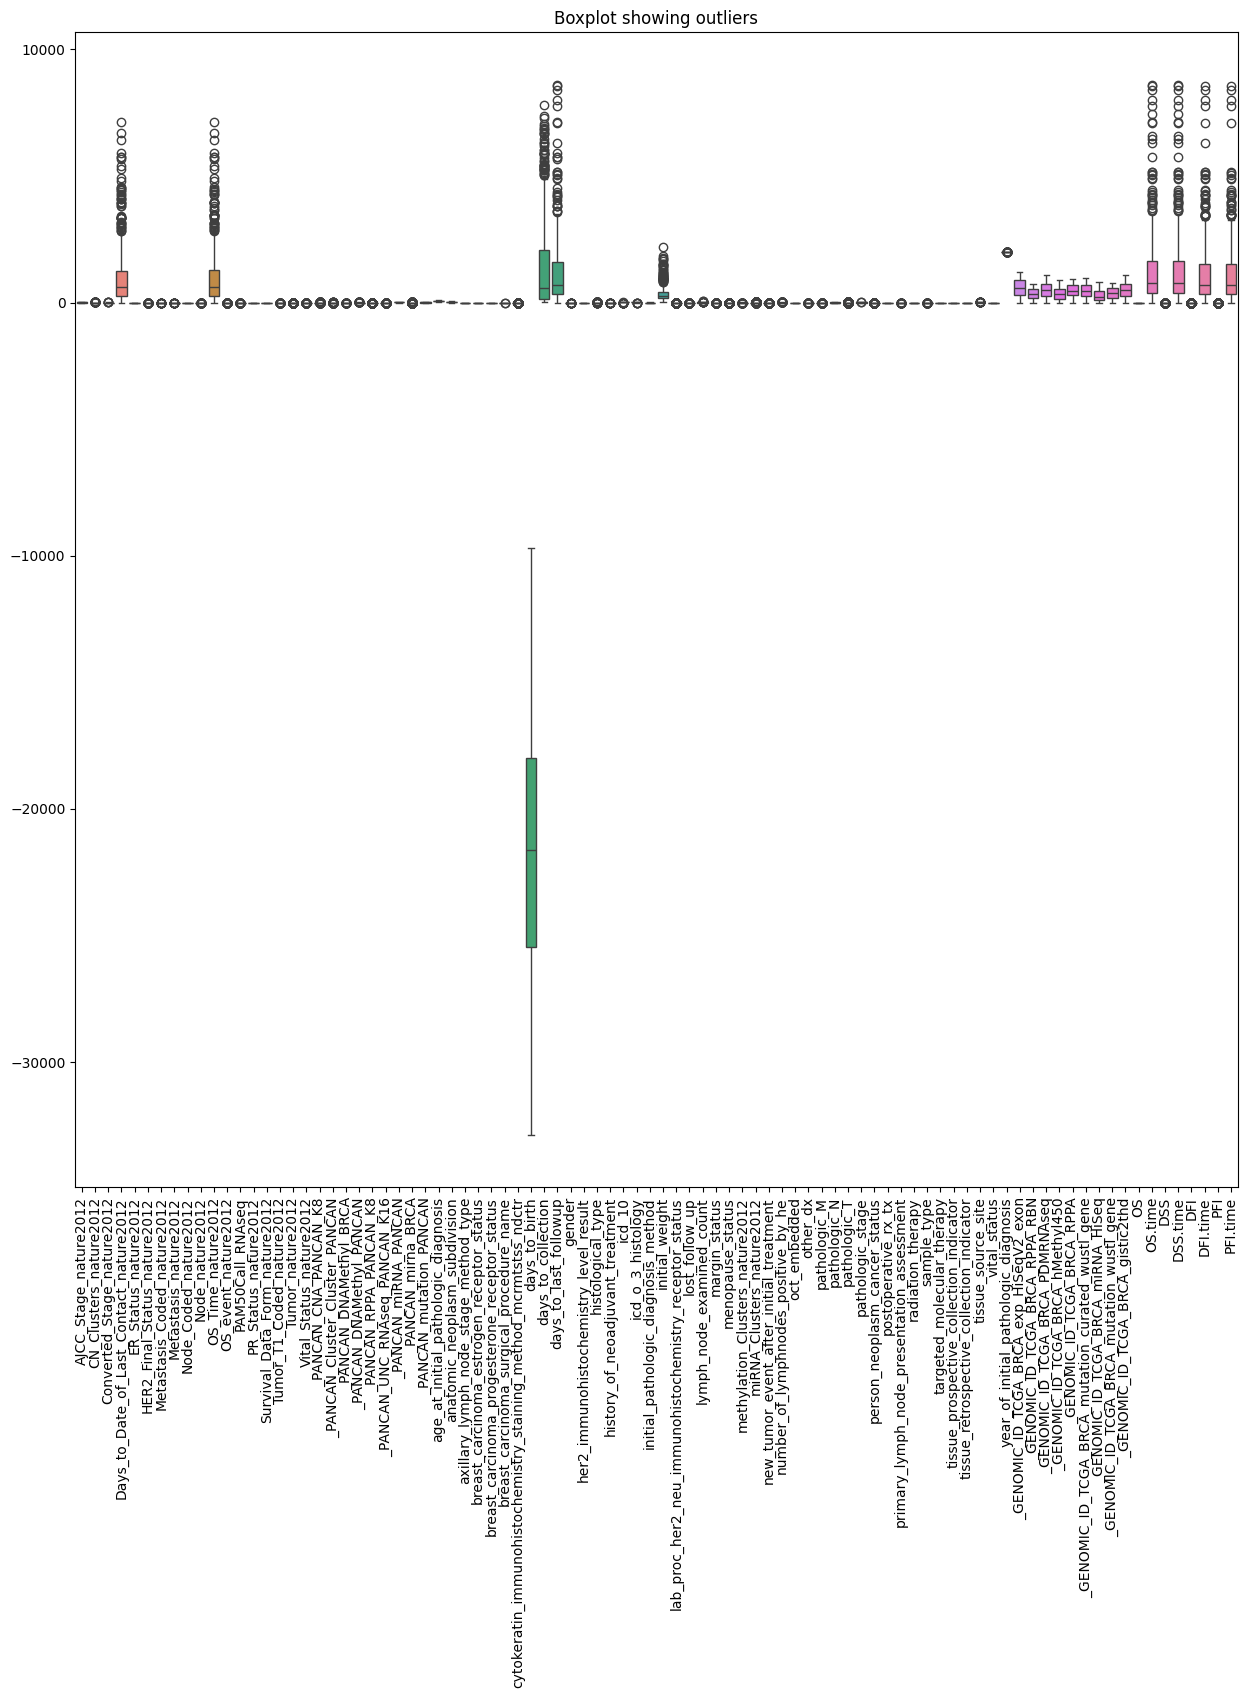

In [39]:
# Checking outliers in the whole dataframe of df1
# Calculate summary statistics
summary = df1.describe()

# Identify outliers using a threshold (e.g., values more than 3 standard deviations away from the mean)
threshold = 3
outliers = (df1 - df1.mean()).abs() > threshold * df1.std()

# Visualize outliers using box plots
plt.figure(figsize=(15,15))
sns.boxplot(data=df1[outliers.any(axis=1)])
plt.xticks(rotation=90)
plt.title('Boxplot showing outliers');

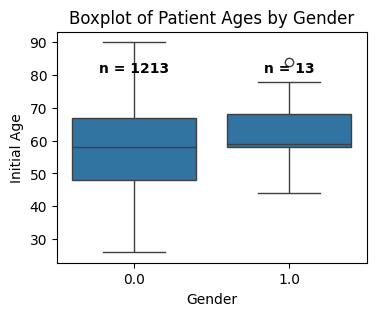

In [40]:
# Age of patients by gender in df1
plt.figure(figsize=(4, 3))
ax = sns.boxplot(x='gender', y='age_at_initial_pathologic_diagnosis', data=df1)
plt.title('Boxplot of Patient Ages by Gender')
plt.ylabel('Initial Age')
plt.xlabel('Gender')
# Annotate the graph with counts of gender
# Calculate counts of each gender
gender_counts = df1['gender'].value_counts()
#
for i, count in enumerate(gender_counts):
    ax.annotate(f'n = {count}', xy=(i, 80),
                ha='center', va='bottom',
                color='black', fontweight='bold')

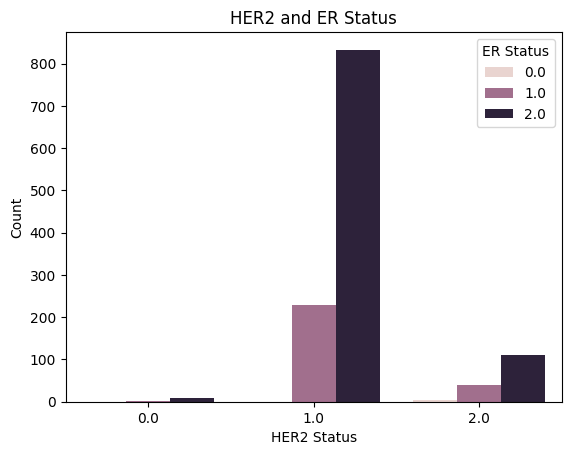

In [41]:
# Plot count plot for HER2 Status and ER Status on the same graph
sns.countplot(data=df1, x='HER2_Final_Status_nature2012', hue='ER_Status_nature2012')

plt.title("HER2 and ER Status")
plt.xlabel("HER2 Status")
plt.ylabel("Count")

# Show plot
plt.legend(title="ER Status")
plt.show()


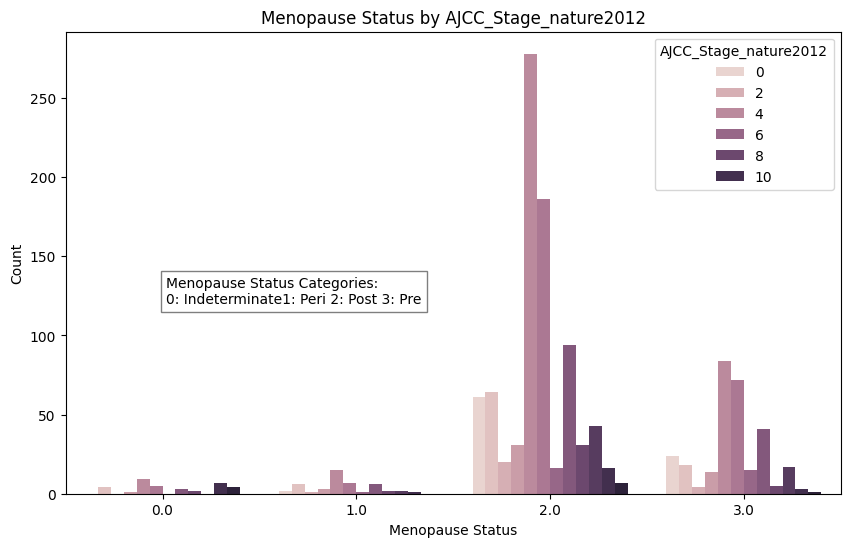

In [42]:
# Menopause by AJCC stage in df1
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='menopause_status', hue='AJCC_Stage_nature2012')
plt.title("Menopause Status by AJCC_Stage_nature2012")
plt.xlabel("Menopause Status")
plt.ylabel("Count")
plt.text(0.02, 120,
         "Menopause Status Categories:\n"
         "0: Indeterminate"
         "1: Peri "
         "2: Post "
         "3: Pre",
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title="AJCC_Stage_nature2012");


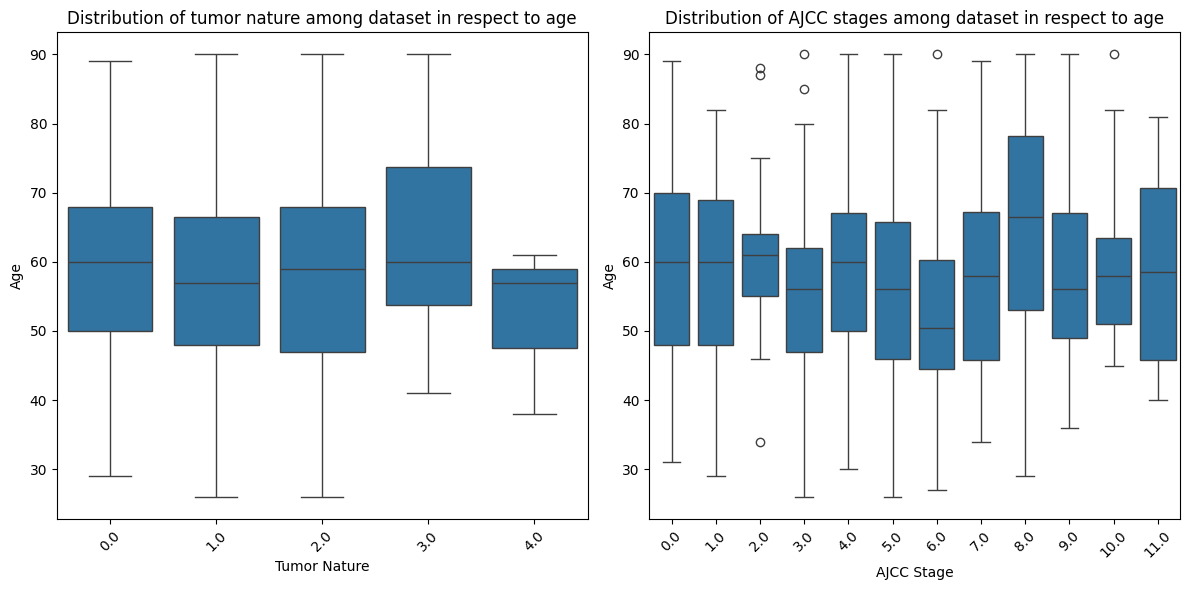

In [43]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Tumor nature in respect to age
plt.subplot(1, 2, 1)
sns.boxplot(data=df1, x='Tumor_nature2012', y='age_at_initial_pathologic_diagnosis')
plt.title("Distribution of tumor nature among dataset in respect to age")
plt.xlabel("Tumor Nature")
plt.ylabel("Age")
plt.xticks(rotation=45)

# AJCC nature in respect to age
plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='AJCC_Stage_nature2012', y='age_at_initial_pathologic_diagnosis')
plt.title("Distribution of AJCC stages among dataset in respect to age")
plt.xlabel("AJCC Stage")
plt.ylabel("Age")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

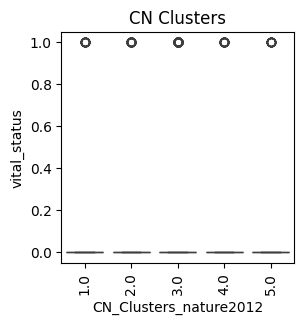

In [44]:
# CN Clusters in df_1
plt.figure(figsize=(3,3))
sns.boxplot(data=df1, x='CN_Clusters_nature2012', y= 'vital_status')
plt.title("CN Clusters")
plt.xticks(rotation=90);

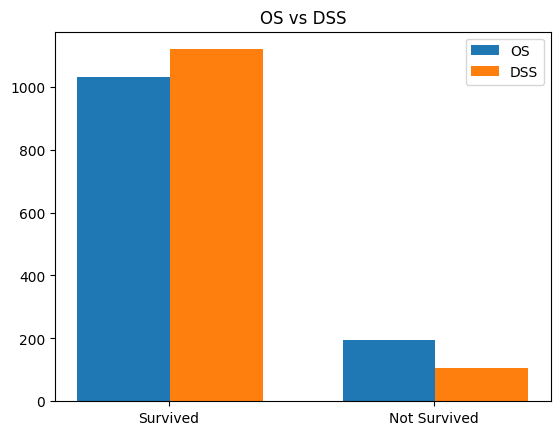

In [45]:
#OSS vs DSS in df_1
count_A = df1['OS'].value_counts()
count_B = df1['DSS'].value_counts()

fig, ax = plt.subplots()

width = 0.35
indices = [0, 1]

rects1 = ax.bar(indices, [count_A.get(0, 0), count_A.get(1, 0)], width, label='OS')
rects2 = ax.bar([i + width for i in indices], [count_B.get(0, 0), count_B.get(1, 0)], width, label='DSS')


ax.set_title('OS vs DSS')
ax.set_xticks([0.17, 1.17])
ax.set_xticklabels(['Survived', 'Not Survived'])
ax.legend()

plt.show()

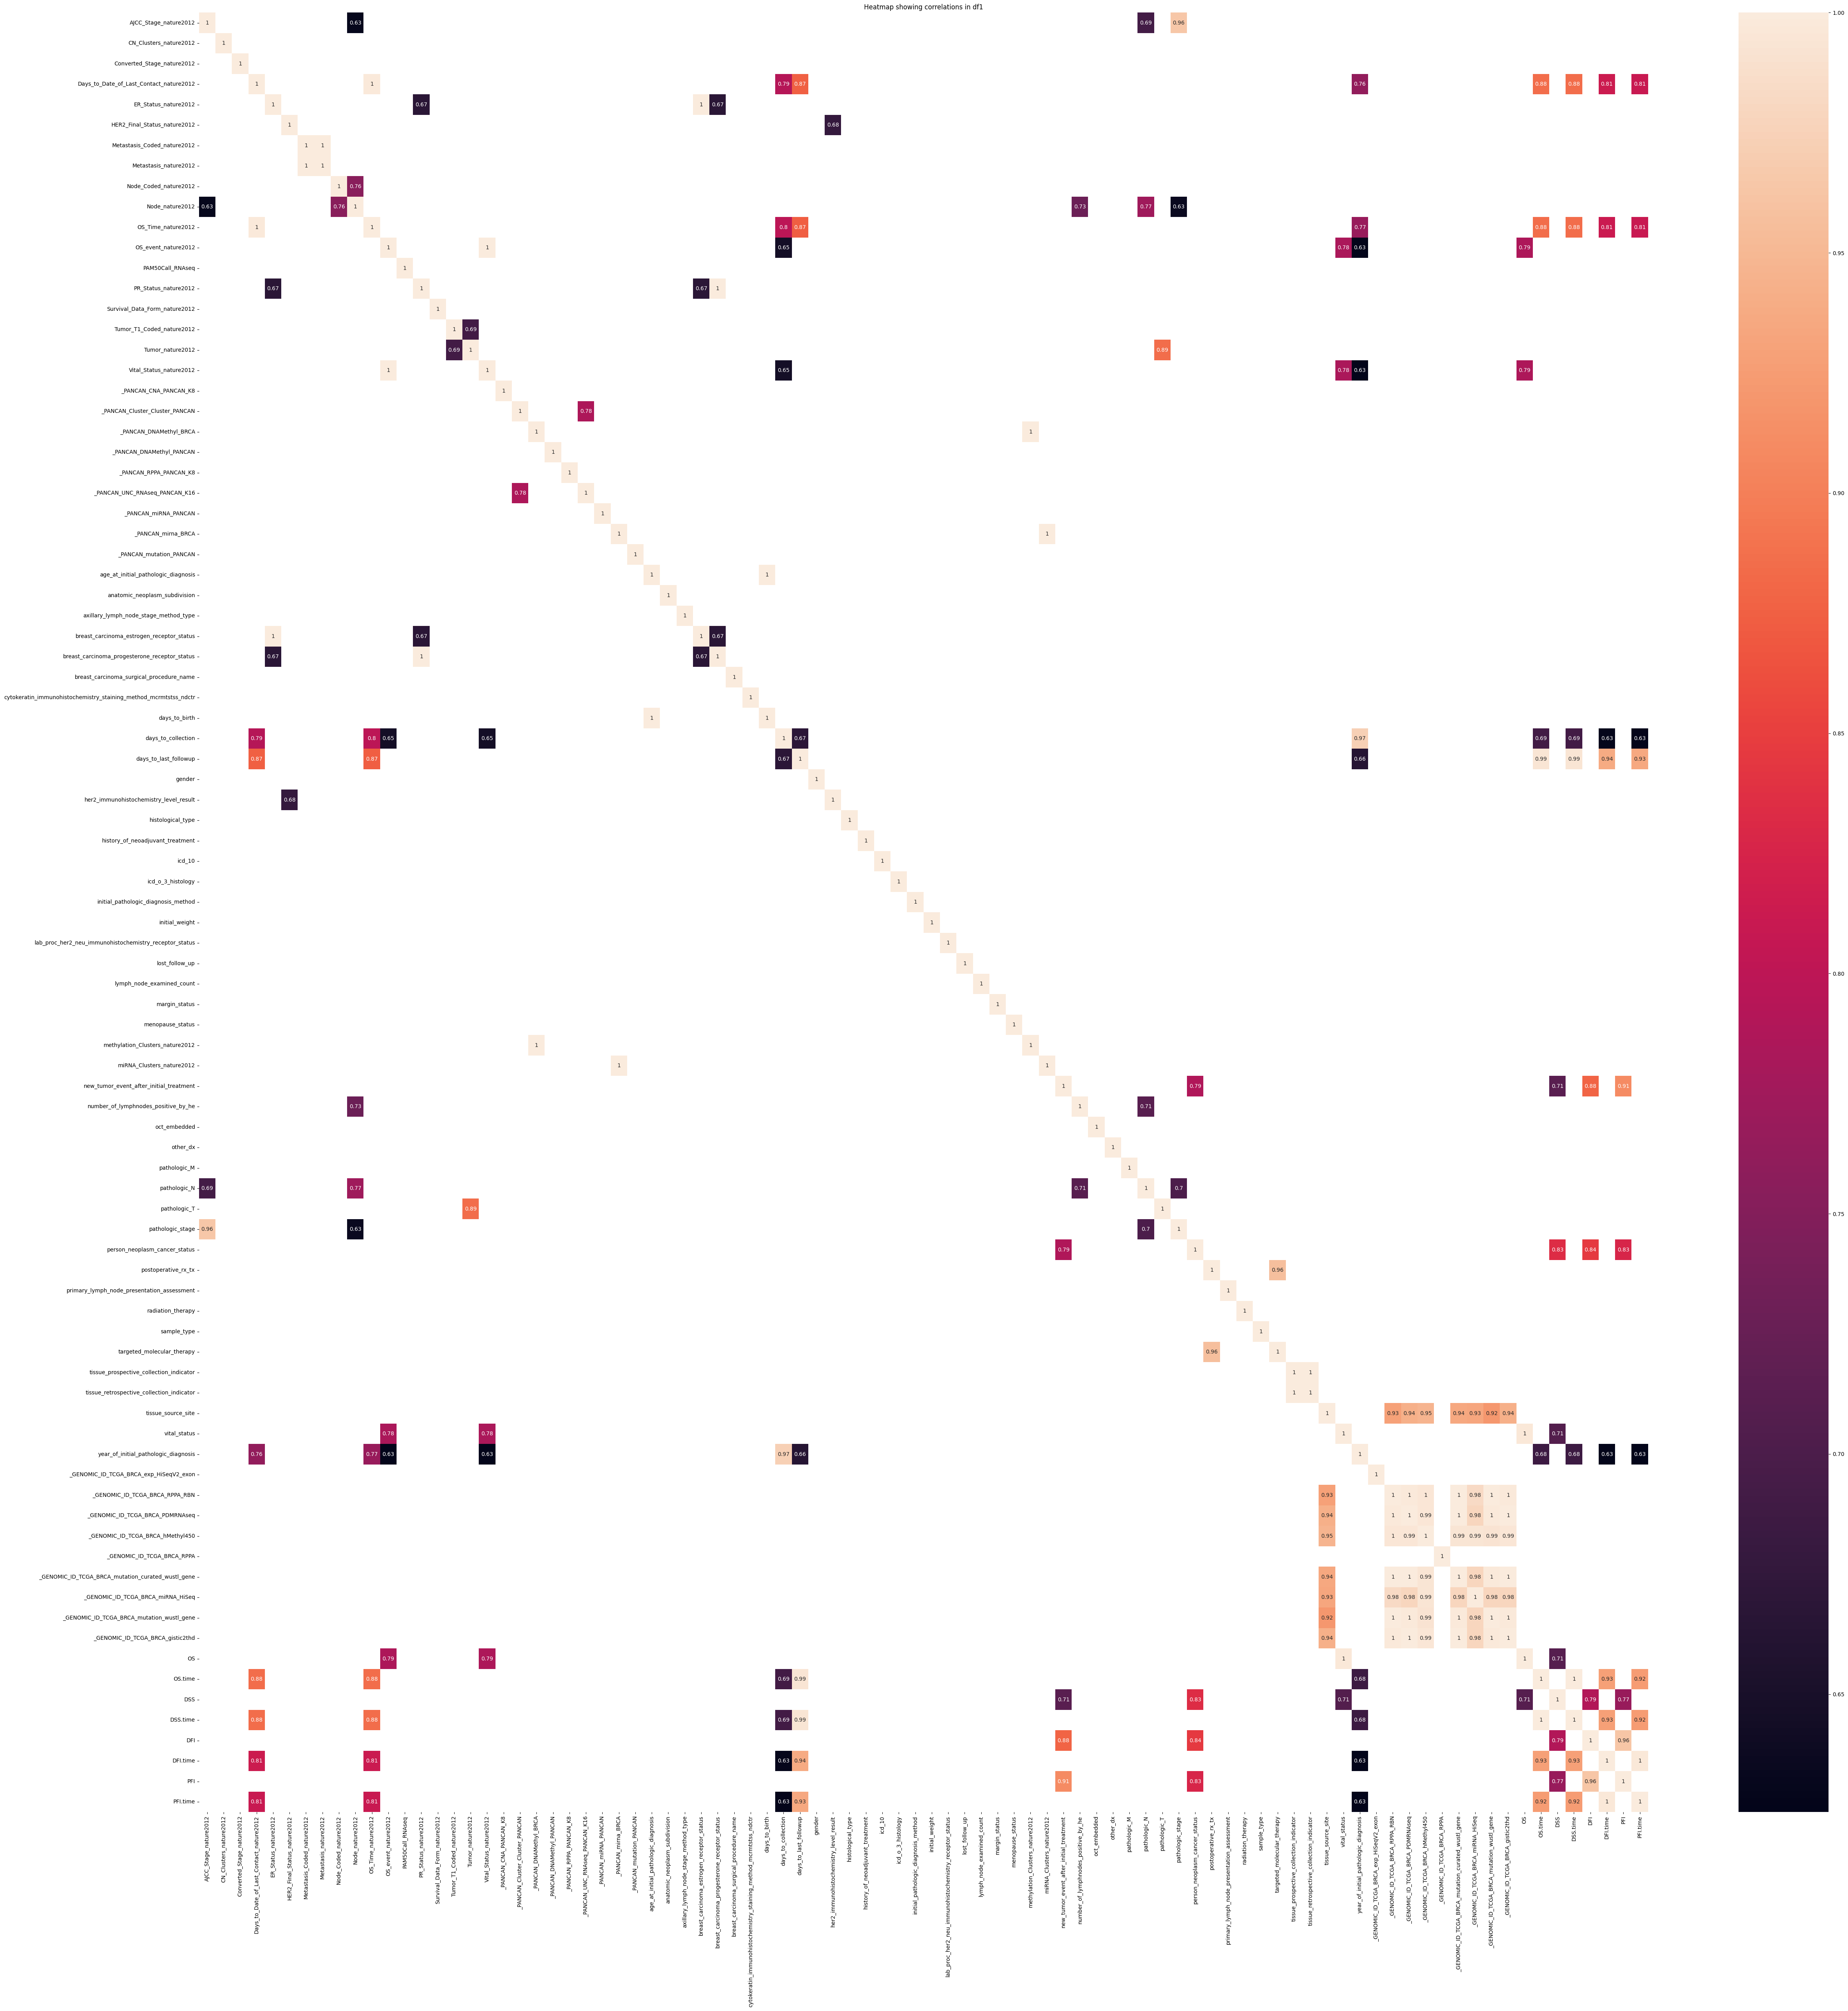

In [46]:
# Heatmap for df1 where the correlation coefficient is higher than 0.6
plt.figure(figsize=(60,60))
sns.heatmap(df1.corr().abs()[df1.corr().abs()>0.6], annot=True)
plt.title("Heatmap showing correlations in df1");

<Axes: >

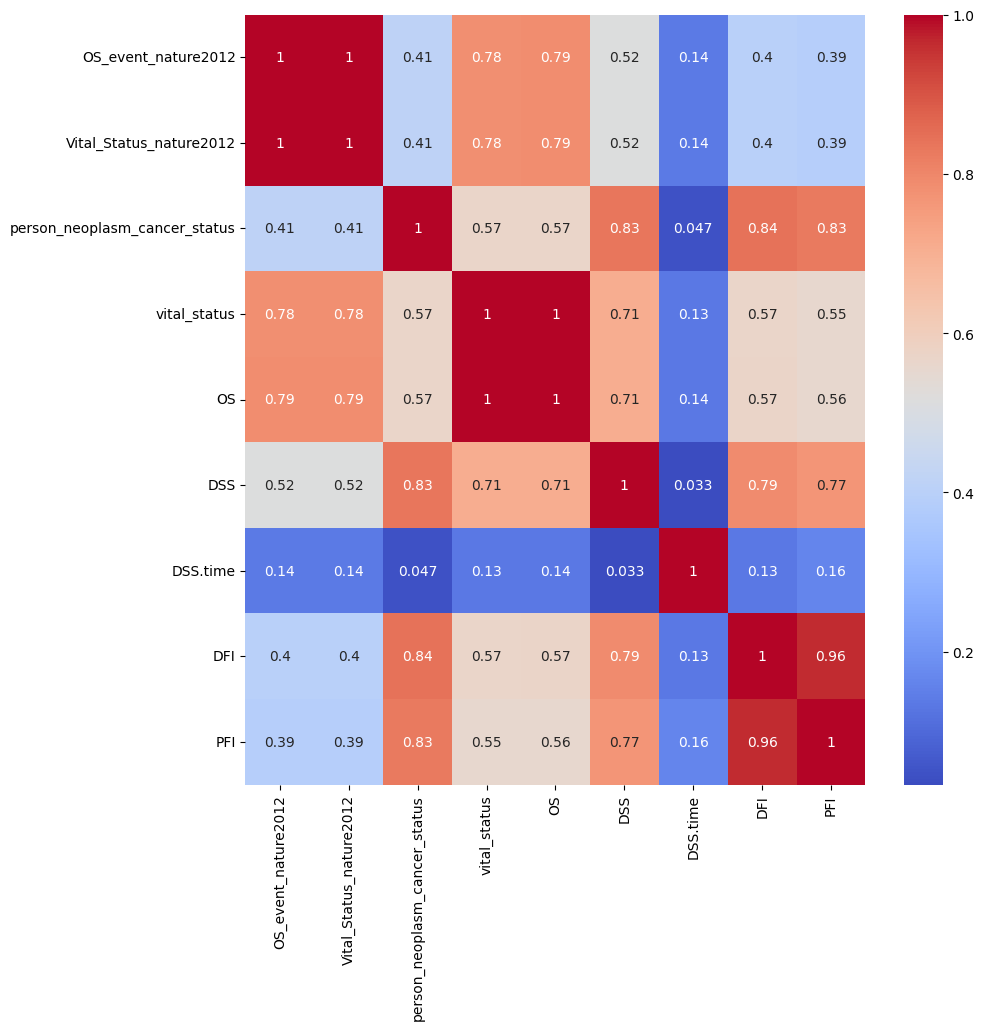

In [47]:
# Set the figure size for the heatmap
plt.figure(figsize=(10,10))

# Calculate the correlation matrix for selected columns in the original dataset 'df1'
corr_matrix = df1[['OS_event_nature2012', 'Vital_Status_nature2012', 'person_neoplasm_cancer_status',
                  'vital_status', 'OS', 'DSS', 'DSS.time', 'DFI', 'PFI']].corr().abs()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

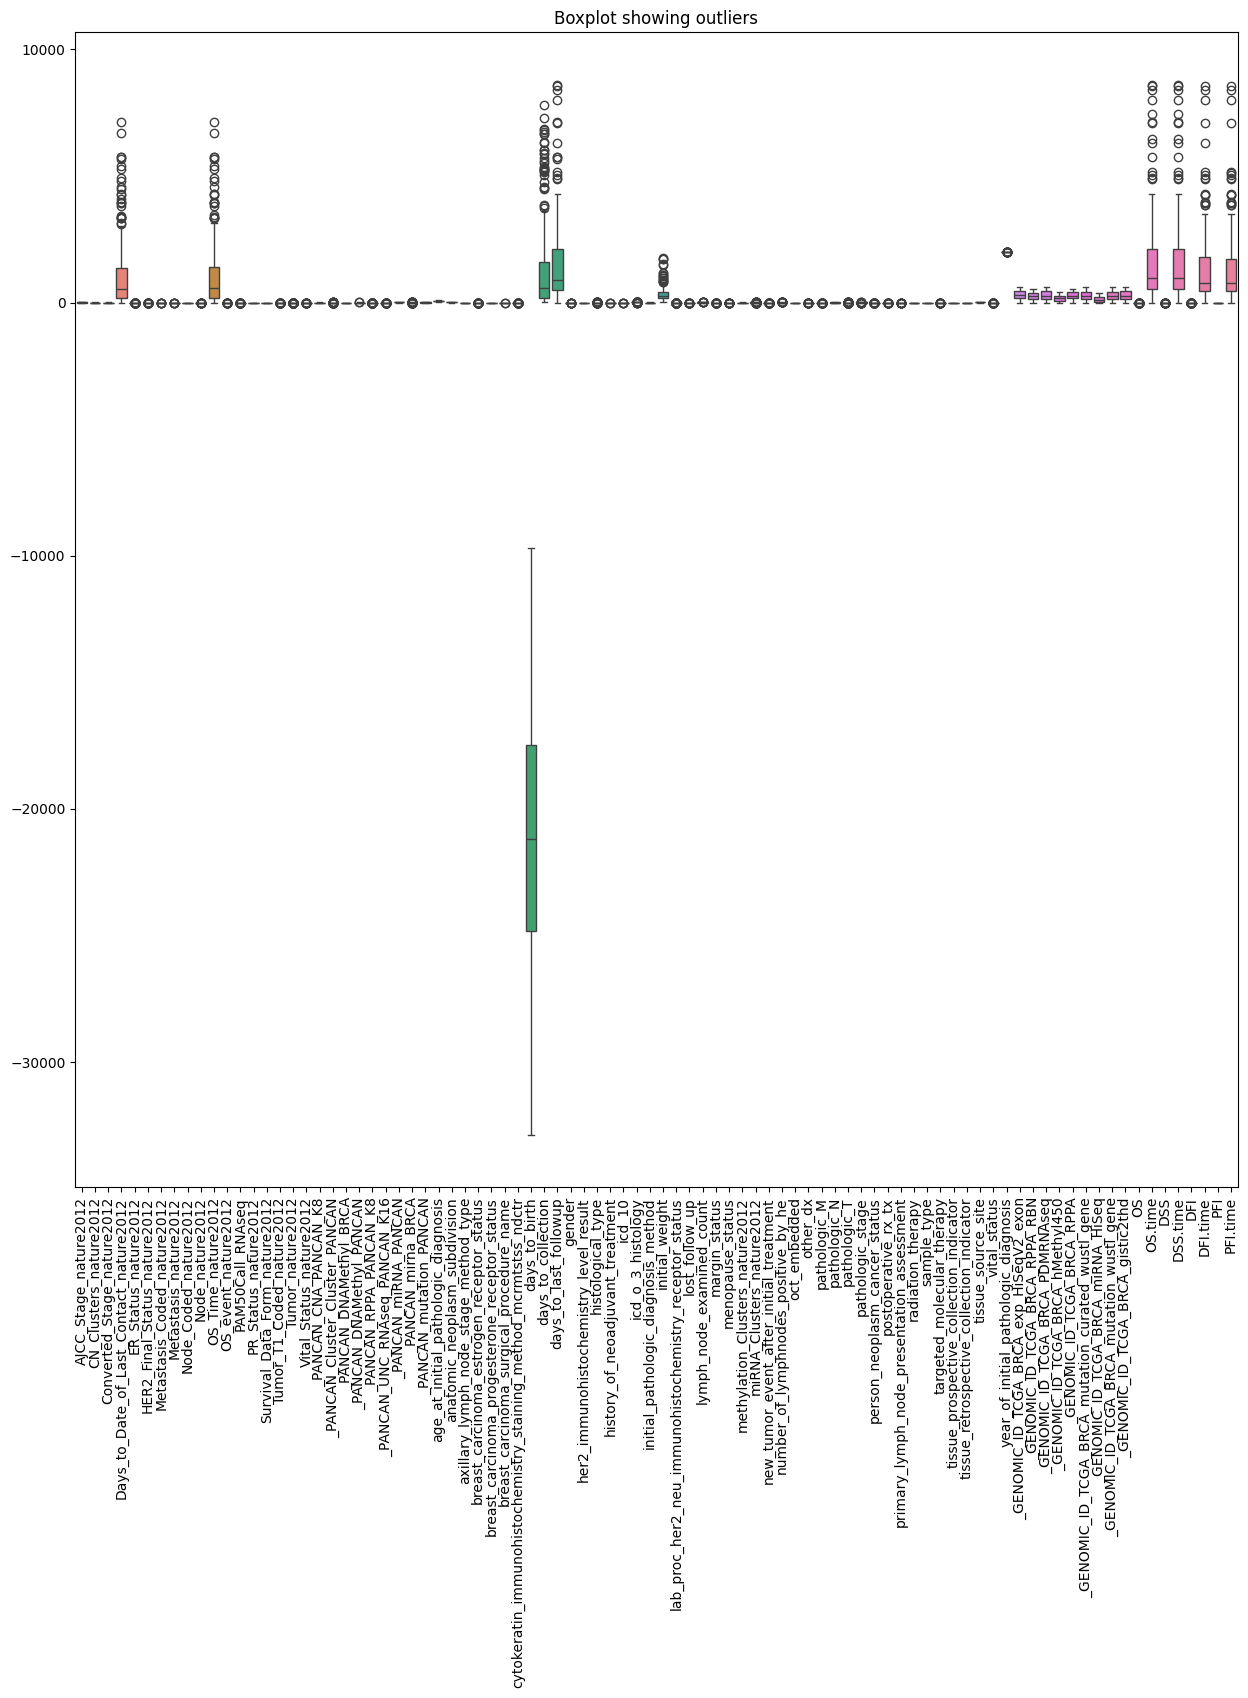

In [48]:
# Checking outliers in the whole dataframe of dfB
# Calculate summary statistics
summary = dfB.describe()

# Identify outliers using a threshold (e.g., values more than 3 standard deviations away from the mean)
threshold = 3
outliers = (dfB - dfB.mean()).abs() > threshold * dfB.std()

# Visualize outliers using box plots
plt.figure(figsize=(15,15))
sns.boxplot(data=dfB[outliers.any(axis=1)])
plt.xticks(rotation=90)
plt.title('Boxplot showing outliers');

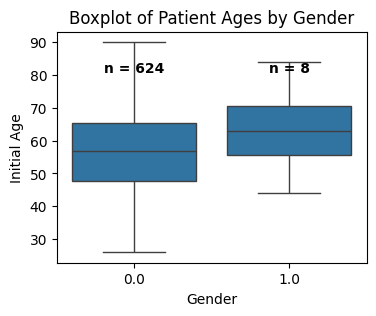

In [49]:
# Visualization for the df_B dataframe after imputation:

# Age of patients by gender
plt.figure(figsize=(4, 3))
ax = sns.boxplot(x='gender', y='age_at_initial_pathologic_diagnosis', data=dfB)
plt.title('Boxplot of Patient Ages by Gender')
plt.ylabel('Initial Age')
plt.xlabel('Gender')

# Annotate the graph with counts of gender
# Calculate counts of each gender
gender_counts = dfB['gender'].value_counts()
#
for i, count in enumerate(gender_counts):
    ax.annotate(f'n = {count}', xy=(i, 80),
                ha='center', va='bottom',
                color='black', fontweight='bold')

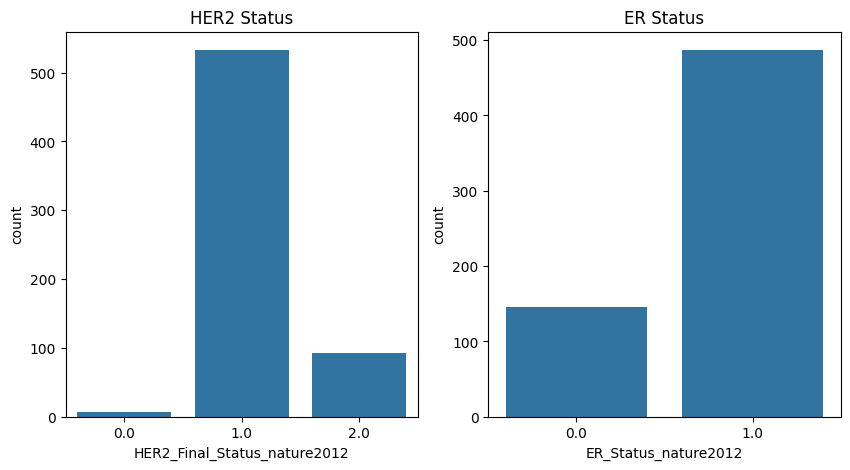

In [50]:
# Look at ER and HER2 receptors status IN df_B
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot count plot for HER2 Status
plt.subplot(1, 2, 1)
sns.countplot(data=dfB, x='HER2_Final_Status_nature2012')
plt.title("HER2 Status")

# Plot count plot for ER Status
plt.subplot(1, 2, 2)
sns.countplot(data=dfB, x='ER_Status_nature2012')
plt.title("ER Status");

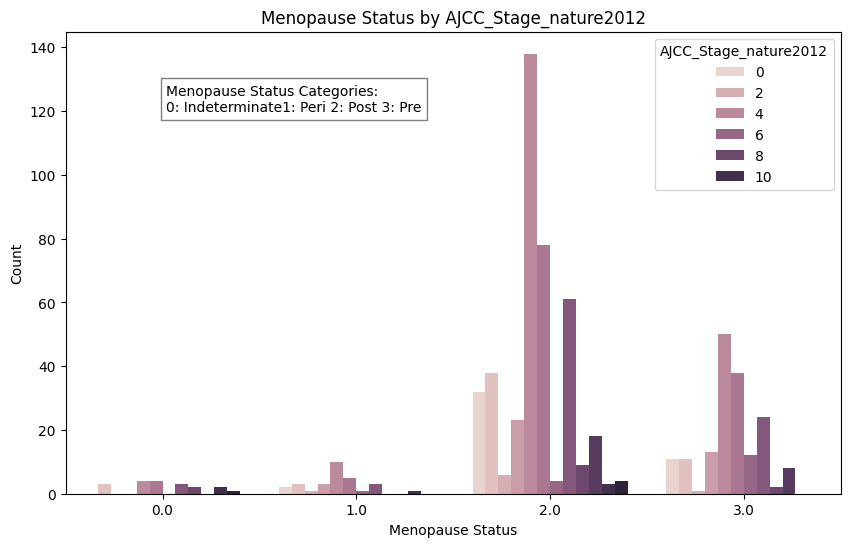

In [51]:
# Look at Menopause status by AJCC stage in df_B

plt.figure(figsize=(10, 6))
sns.countplot(data=dfB, x='menopause_status', hue='AJCC_Stage_nature2012')
plt.title("Menopause Status by AJCC_Stage_nature2012")
plt.xlabel("Menopause Status")
plt.ylabel("Count")
plt.text(0.02, 120,
         "Menopause Status Categories:\n"
         "0: Indeterminate"
         "1: Peri "
         "2: Post "
         "3: Pre",
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5))

plt.legend(title="AJCC_Stage_nature2012");

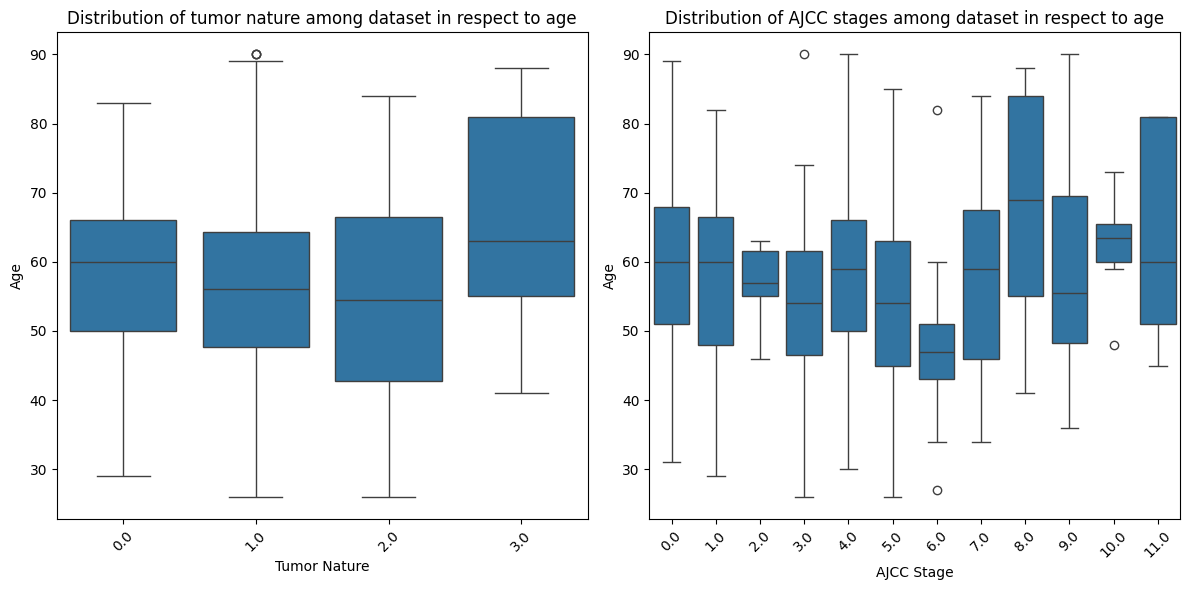

In [52]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Tumor nature in respect to age
plt.subplot(1, 2, 1)
sns.boxplot(data=dfB, x='Tumor_nature2012', y='age_at_initial_pathologic_diagnosis')
plt.title("Distribution of tumor nature among dataset in respect to age")
plt.xlabel("Tumor Nature")
plt.ylabel("Age")
plt.xticks(rotation=45)

# AJCC nature in respect to age
plt.subplot(1, 2, 2)
sns.boxplot(data=dfB, x='AJCC_Stage_nature2012', y='age_at_initial_pathologic_diagnosis')
plt.title("Distribution of AJCC stages among dataset in respect to age")
plt.xlabel("AJCC Stage")
plt.ylabel("Age")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

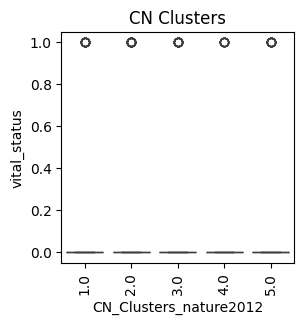

In [53]:
# CN Clusters in df_B
plt.figure(figsize=(3,3))
sns.boxplot(data=dfB, x='CN_Clusters_nature2012', y= 'vital_status')
plt.title("CN Clusters")
plt.xticks(rotation=90);

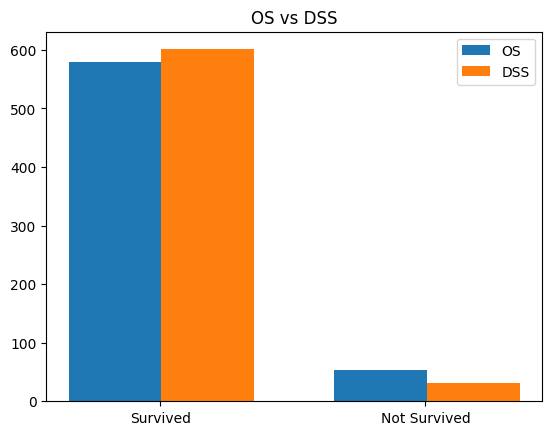

In [54]:
#OSS vs DSS in df_B
count_A = dfB['OS'].value_counts()
count_B = dfB['DSS'].value_counts()

fig, ax = plt.subplots()

width = 0.35
indices = [0, 1]

rects1 = ax.bar(indices, [count_A.get(0, 0), count_A.get(1, 0)], width, label='OS')
rects2 = ax.bar([i + width for i in indices], [count_B.get(0, 0), count_B.get(1, 0)], width, label='DSS')


ax.set_title('OS vs DSS')
ax.set_xticks([0.17, 1.17])
ax.set_xticklabels(['Survived', 'Not Survived'])
ax.legend()

plt.show()

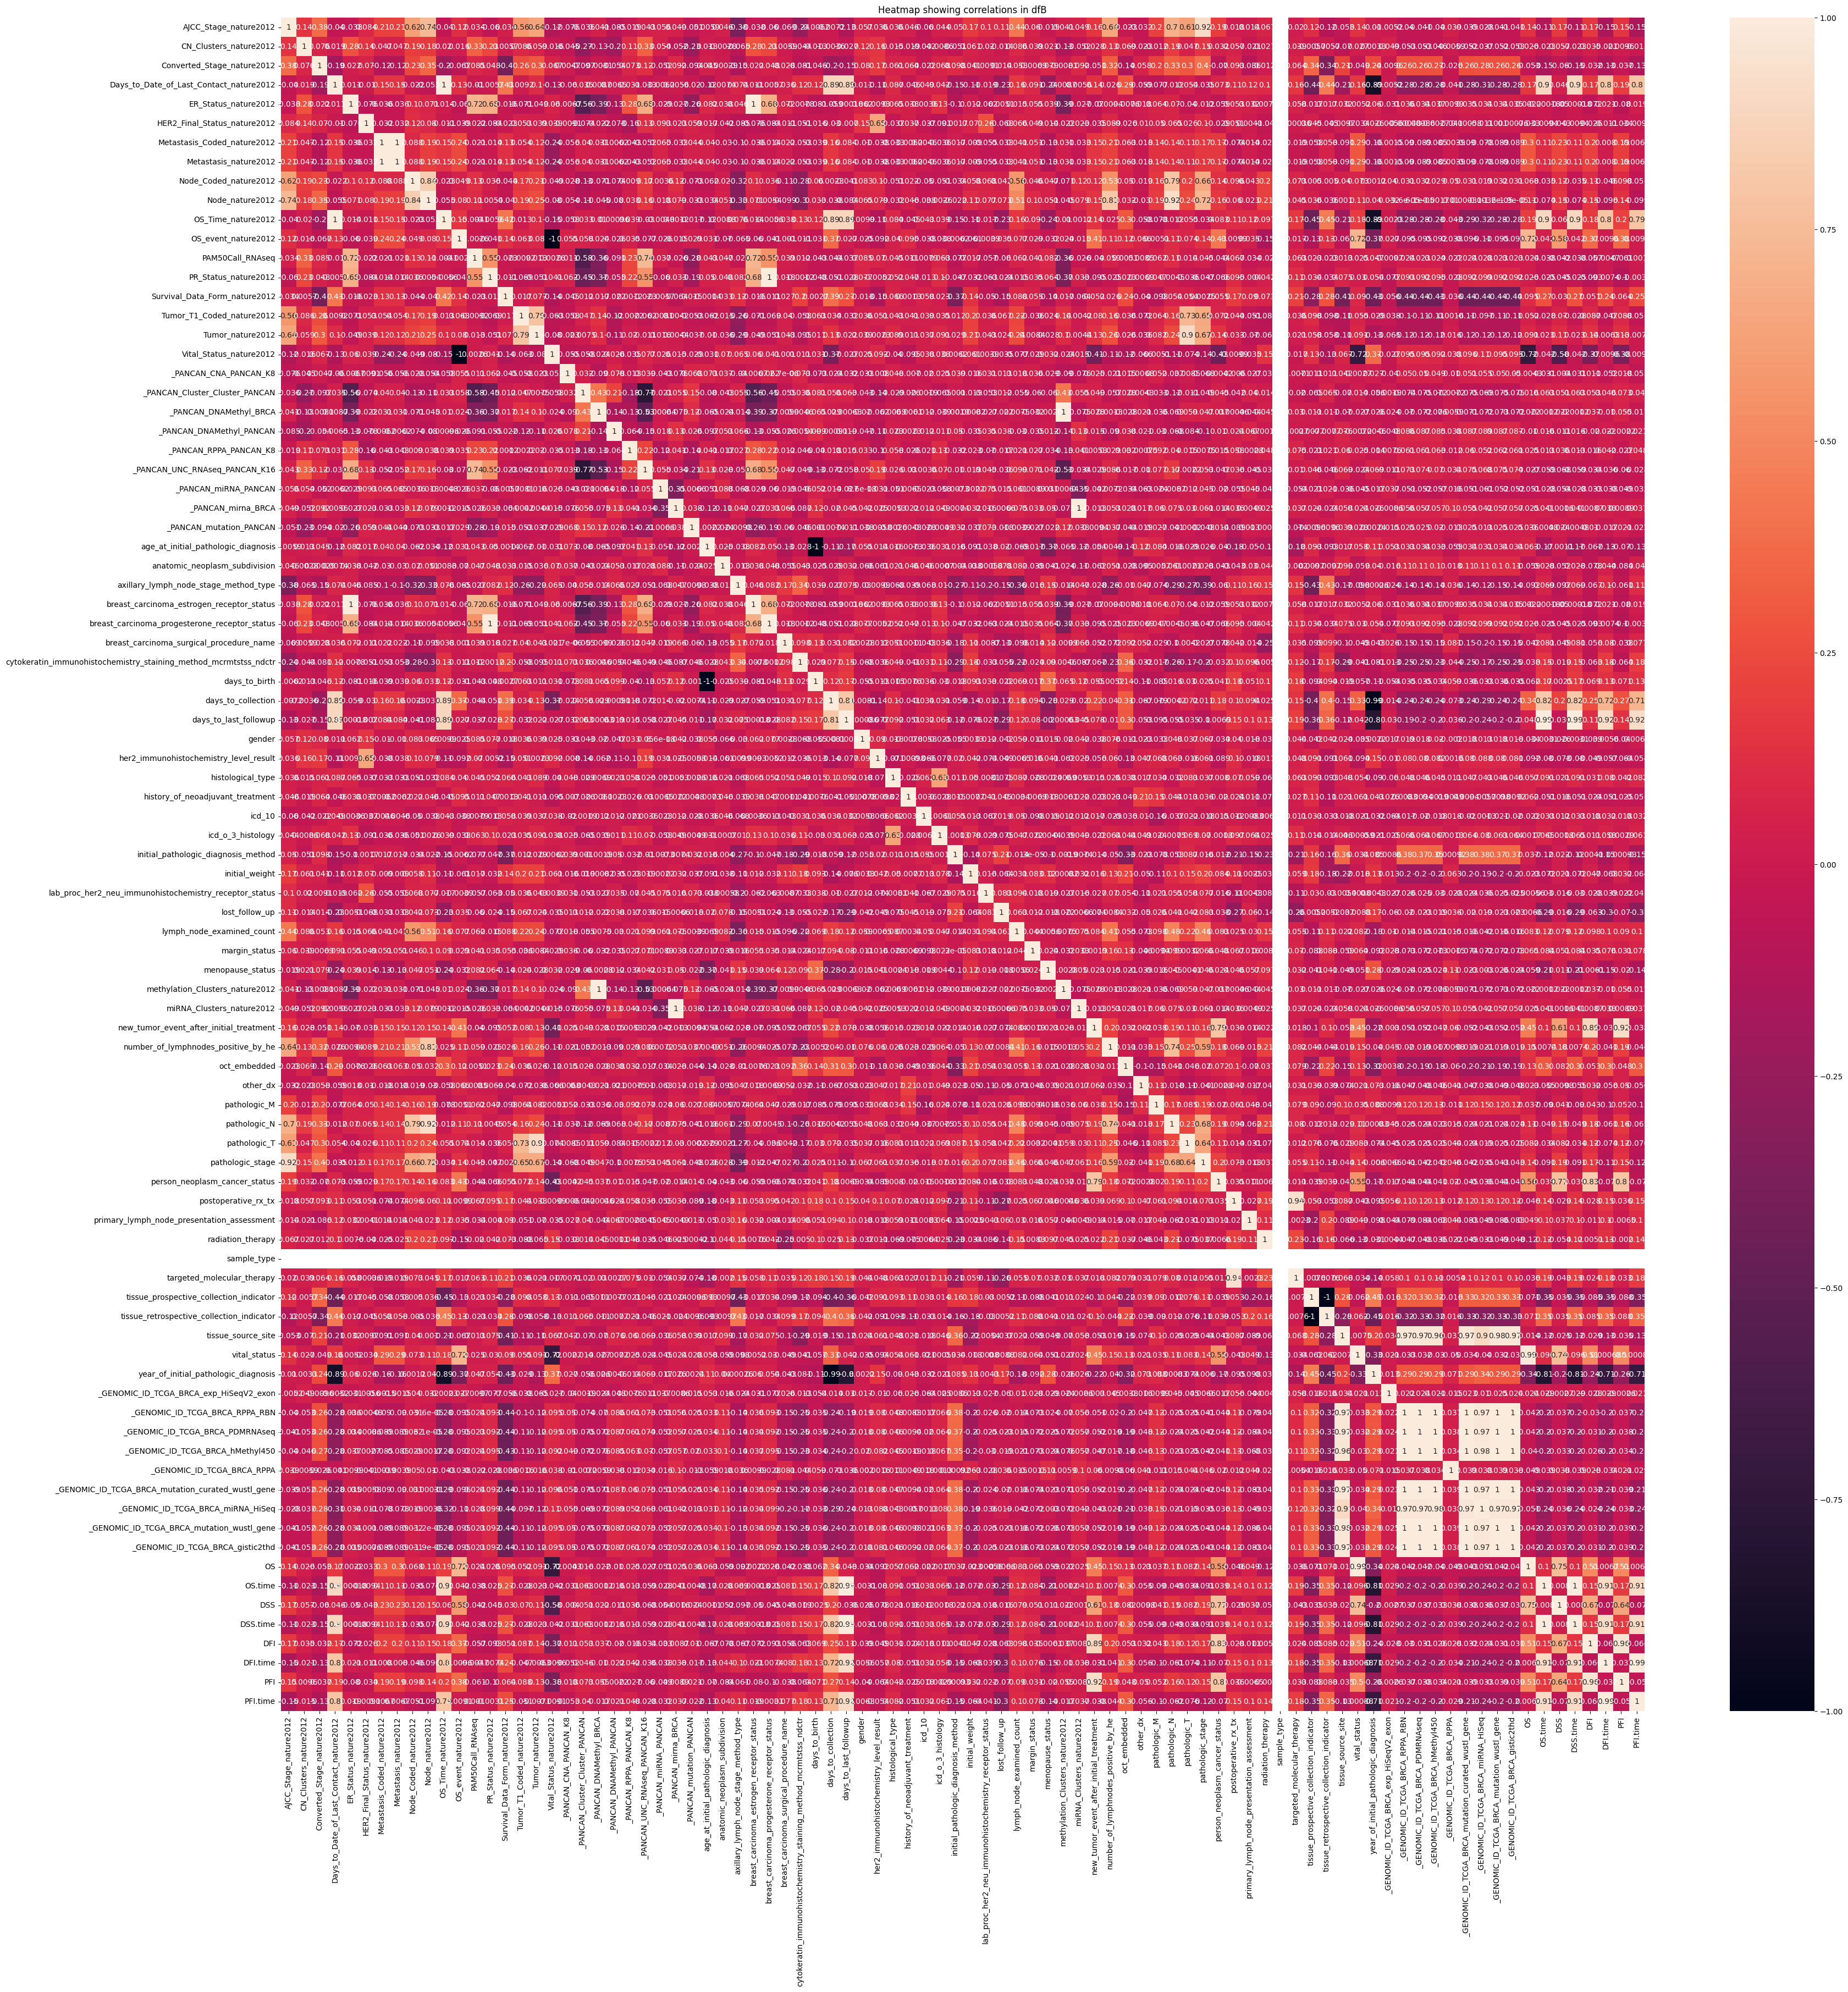

In [55]:
# Heatmap for df_B
plt.figure(figsize=(40,40))
sns.heatmap(dfB.corr(), annot=True)
plt.title("Heatmap showing correlations in dfB");

<Axes: >

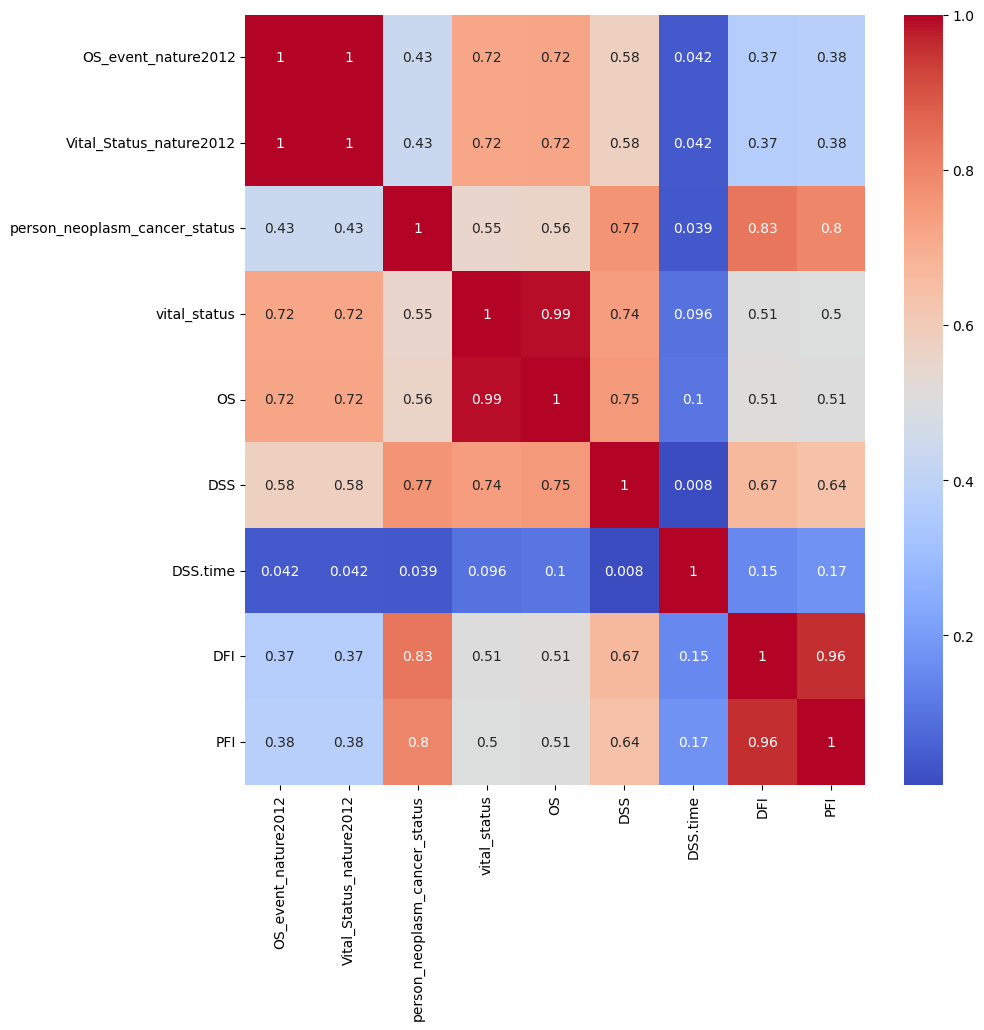

In [56]:
# Set the figure size for the heatmap
plt.figure(figsize=(10,10))

# Calculate the correlation matrix for selected columns in the original dataset 'dfB'
corr_matrix = dfB[['OS_event_nature2012', 'Vital_Status_nature2012', 'person_neoplasm_cancer_status',
                  'vital_status', 'OS', 'DSS', 'DSS.time', 'DFI', 'PFI']].corr().abs()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [57]:
# Calculate correlation matrix
correlation_matrix = dfB.corr().abs()
# Find variables highly correlated with 'vital_status' (correlation coefficient > 0.5)
correlated_variables = correlation_matrix['vital_status'][correlation_matrix['vital_status'] > 0.5].index.tolist()
# Print the list of correlated variables
print("Correlated variables with vital status in df_B", correlated_variables)

Correlated variables with vital status in df_B ['OS_event_nature2012', 'Vital_Status_nature2012', 'person_neoplasm_cancer_status', 'vital_status', 'OS', 'DSS', 'DFI', 'PFI']


In [58]:
print(df1.menopause_status.value_counts())
print(dfB.menopause_status.value_counts())

menopause_status
2.0    847
3.0    298
1.0     46
0.0     35
Name: count, dtype: int64
menopause_status
2.0    414
3.0    170
1.0     29
0.0     19
Name: count, dtype: int64


##Drop **Survival** Features based on Correlation with Target( more than 50% correlation:)

###we decided to remove all features with more than 50% correlation with target

In [59]:
# Removing columns with 50% correlation with target

to_drop = ['OS_event_nature2012', 'Vital_Status_nature2012',
           'person_neoplasm_cancer_status', 'OS',
           'DSS','DSS.time', 'DFI', 'PFI']
df_1.drop(to_drop, axis=1, inplace=True)
df1.drop(to_drop, axis=1, inplace=True)
dfB.drop(to_drop, axis=1, inplace=True)
df_B.drop(to_drop, axis=1, inplace=True)


##Save **Final** Data **Before** GET_DUMMIES

In [60]:
# Show the first 5 rows of df1
df1.head()

AJCC_Stage_nature2012  CN_Clusters_nature2012  \
_INTEGRATION                                                     
TCGA-3C-AAAU-01                   10.0                     3.0   
TCGA-3C-AALI-01                    4.0                     3.0   
TCGA-3C-AALJ-01                    5.0                     3.0   
TCGA-3C-AALK-01                    1.0                     3.0   
TCGA-4H-AAAK-01                    7.0                     2.0   

                 Converted_Stage_nature2012  \
_INTEGRATION                                  
TCGA-3C-AAAU-01                         3.0   
TCGA-3C-AALI-01                         3.0   
TCGA-3C-AALJ-01                         4.0   
TCGA-3C-AALK-01                         2.0   
TCGA-4H-AAAK-01                         4.0   

                 Days_to_Date_of_Last_Contact_nature2012  \
_INTEGRATION                                               
TCGA-3C-AAAU-01                                   2821.0   
TCGA-3C-AALI-01                                   3201.0   
TCGA-3C-AALJ-01                                    776.0   
TCGA-3C-AALK-01                                    754.0   
TCGA-4H-AAAK-01                                    408.0   

                 ER_Status_nature2012  HER2_Final_Status_nature2012  \
_INTEGRATION                                                          
TCGA-3C-AAAU-01                   2.0                           1.0   
TCGA-3C-AALI-01                   2.0                           1.0   
TCGA-3C-AALJ-01                   2.0                           1.0   
TCGA-3C-AALK-01                   2.0                           1.0   
TCGA-4H-AAAK-01                   2.0                           1.0   

                 Metastasis_Coded_nature2012  Metastasis_nature2012  \
_INTEGRATION                                                          
TCGA-3C-AAAU-01                          0.0                    0.0   
TCGA-3C-AALI-01                          0.0                    0.0   
TCGA-3C-AALJ-01                          0.0                    0.0   
TCGA-3C-AALK-01                          0.0                    0.0   
TCGA-4H-AAAK-01                          0.0                    0.0   

                 Node_Coded_nature2012  Node_nature2012  ...  \
_INTEGRATION                                             ...   
TCGA-3C-AAAU-01                    1.0              3.0  ...   
TCGA-3C-AALI-01                    1.0              1.0  ...   
TCGA-3C-AALJ-01                    1.0              1.0  ...   
TCGA-3C-AALK-01                    1.0              1.0  ...   
TCGA-4H-AAAK-01                    1.0              2.0  ...   

                 _GENOMIC_ID_TCGA_BRCA_PDMRNAseq  \
_INTEGRATION                                       
TCGA-3C-AAAU-01                              0.0   
TCGA-3C-AALI-01                              1.0   
TCGA-3C-AALJ-01                              2.0   
TCGA-3C-AALK-01                              3.0   
TCGA-4H-AAAK-01                              4.0   

                 _GENOMIC_ID_TCGA_BRCA_hMethyl450  _GENOMIC_ID_TCGA_BRCA_RPPA  \
_INTEGRATION                                                                    
TCGA-3C-AAAU-01                               0.0                       423.0   
TCGA-3C-AALI-01                               1.0                       101.0   
TCGA-3C-AALJ-01                               2.0                       667.0   
TCGA-3C-AALK-01                               3.0                       266.0   
TCGA-4H-AAAK-01                               4.0                       573.0   

                 _GENOMIC_ID_TCGA_BRCA_mutation_curated_wustl_gene  \
_INTEGRATION                                                         
TCGA-3C-AAAU-01                                                3.0   
TCGA-3C-AALI-01                                                4.0   
TCGA-3C-AALJ-01                                                3.0   
TCGA-3C-AALK-01                                                3.0   
TCGA-

In [61]:
# Show the first 5 rows of dfB
dfB.head()

AJCC_Stage_nature2012  CN_Clusters_nature2012  \
_INTEGRATION                                                     
TCGA-A1-A0SF-01                    4.0                     3.0   
TCGA-A1-A0SH-01                    4.0                     5.0   
TCGA-A1-A0SJ-01                    7.0                     3.0   
TCGA-A1-A0SN-01                    7.0                     5.0   
TCGA-A1-A0SO-01                    5.0                     1.0   

                 Converted_Stage_nature2012  \
_INTEGRATION                                  
TCGA-A1-A0SF-01                         2.0   
TCGA-A1-A0SH-01                         2.0   
TCGA-A1-A0SJ-01                         4.0   
TCGA-A1-A0SN-01                         2.0   
TCGA-A1-A0SO-01                         3.0   

                 Days_to_Date_of_Last_Contact_nature2012  \
_INTEGRATION                                               
TCGA-A1-A0SF-01                                   1463.0   
TCGA-A1-A0SH-01                                   1437.0   
TCGA-A1-A0SJ-01                                    426.0   
TCGA-A1-A0SN-01                                   1196.0   
TCGA-A1-A0SO-01                                    852.0   

                 ER_Status_nature2012  HER2_Final_Status_nature2012  \
_INTEGRATION                                                          
TCGA-A1-A0SF-01                   1.0                           1.0   
TCGA-A1-A0SH-01                   0.0                           1.0   
TCGA-A1-A0SJ-01                   1.0                           1.0   
TCGA-A1-A0SN-01                   1.0                           2.0   
TCGA-A1-A0SO-01                   0.0                           1.0   

                 Metastasis_Coded_nature2012  Metastasis_nature2012  \
_INTEGRATION                                                          
TCGA-A1-A0SF-01                          0.0                    0.0   
TCGA-A1-A0SH-01                          0.0                    0.0   
TCGA-A1-A0SJ-01                          0.0                    0.0   
TCGA-A1-A0SN-01                          0.0                    0.0   
TCGA-A1-A0SO-01                          0.0                    0.0   

                 Node_Coded_nature2012  Node_nature2012  ...  \
_INTEGRATION                                             ...   
TCGA-A1-A0SF-01                    0.0              0.0  ...   
TCGA-A1-A0SH-01                    0.0              0.0  ...   
TCGA-A1-A0SJ-01                    1.0              1.0  ...   
TCGA-A1-A0SN-01                    1.0              1.0  ...   
TCGA-A1-A0SO-01                    1.0              1.0  ...   

                 _GENOMIC_ID_TCGA_BRCA_PDMRNAseq  \
_INTEGRATION                                       
TCGA-A1-A0SF-01                              0.0   
TCGA-A1-A0SH-01                              1.0   
TCGA-A1-A0SJ-01                              2.0   
TCGA-A1-A0SN-01                              3.0   
TCGA-A1-A0SO-01                              4.0   

                 _GENOMIC_ID_TCGA_BRCA_hMethyl450  _GENOMIC_ID_TCGA_BRCA_RPPA  \
_INTEGRATION                                                                    
TCGA-A1-A0SF-01                               0.0                       514.0   
TCGA-A1-A0SH-01                               1.0                       148.0   
TCGA-A1-A0SJ-01                               2.0                       110.0   
TCGA-A1-A0SN-01                               3.0                       233.0   
TCGA-A1-A0SO-01                               4.0                       122.0   

                 _GENOMIC_ID_TCGA_BRCA_mutation_curated_wustl_gene  \
_INTEGRATION                                                         
TCGA-A1-A0SF-01                                                0.0   
TCGA-A1-A0SH-01                                                1.0   
TCGA-A1-A0SJ-01                                                2.0   
TCGA-A1-A0SN-01                                                3.0   
TCGA-

In [62]:
# Importing the saved dataframes and setting the index as integration column
try:
  df1.to_csv('../data/label_encoder/final_df.csv', index=True)
except Exception as e:
  df1.to_csv('/content/drive/MyDrive/Datasets/final_df.csv',index=True)


try:
  dfB.to_csv('../data/label_encoder/final_dfB.csv', index=True)
except Exception as e:
  dfB.to_csv('/content/drive/MyDrive/Datasets/final_dfB.csv',index=True)

##START ENCODING WITH **GET_DUMMIES**


df_B data with NaNs and both  categorical and numerical features...df_B['gender'].unique=['male', 'female', Nan]
dfB data only has numerical features dfB['gender'].unique= [0,1]

after this code we have dfB['gender'].unique= ['male', 'female'] without Nans

In [63]:
# Print first few columns of each dataset
dfB.index = df_B.index
df1.index= df_1.index

In [64]:
# Use label encoder and then use randomforest imputer.
for column in df_B.select_dtypes(include=['object']).columns:
  L1 =dfB[column].unique() # After imputer
  L2_with_nan=df_B[column].unique() # Before labelencoder and also should remove NaN type
  L2 =list([value for value in L2_with_nan if pd.notna(value)])
  dfB[column].replace(L1,   L2, inplace=True)
# After that we can use get_dummies

C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\2030967757.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfB[column].replace(L1,   L2, inplace=True)
C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\2030967757.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfB[column].replace(L1,   L2, 

In [65]:
# Use label encoder and then use randomforest imputer.
for column in df_1.select_dtypes(include=['object']).columns:
  L1 =df1[column].unique() # After imputer
  L2_with_nan=df_1[column].unique() # Before labelencoder and also should remove NaN type
  L2 =list([value for value in L2_with_nan if pd.notna(value)])
  df1[column].replace(L1,   L2, inplace=True)
# After that we can use get_dummies

C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\1291084998.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace(L1,   L2, inplace=True)
C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\1291084998.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[column].replace(L1,   L2, 

In [66]:
# Splitting the original dataset 'df1' into features (data) and target variable containing vital_status (target)
data = df1.drop('vital_status', axis=1)
target = df1['vital_status']

# Splitting the original dataset 'dfB' into features (dataB) and target variable containing vital_status (targetB)
dataB = dfB.drop('vital_status', axis=1)
targetB = dfB['vital_status']

# Printing the shapes of the feature and target variables for both datasets
print("Shapes of original dataset (data):", data.shape, "and target variable (target):", target.shape)
print("Shapes of modified dataset (dataB):", dataB.shape, "and target variable (targetB):", targetB.shape)

Shapes of original dataset (data): (1226, 79) and target variable (target): (1226,)
Shapes of modified dataset (dataB): (632, 79) and target variable (targetB): (632,)


In [67]:
# Transform categorical variables into dummy/indicator variables for the original dataset 'data'
data =pd.get_dummies(data)

# Transform categorical variables into dummy/indicator variables for the original dataset 'dataB'
dataB = pd.get_dummies(dataB)

# Print the shapes of the datasets after one-hot encoding
print("Shape of original dataset after one-hot encoding:", data.shape)
print("Shape of modified dataset after one-hot encoding:", dataB.shape)

Shape of original dataset after one-hot encoding: (1226, 8885)
Shape of modified dataset after one-hot encoding: (632, 5364)


##**finalize** Data and  **Save** DATA **AFTER** **GET_DUMMIES**

In [68]:
# Replace categorical labels with numerical values in the original target variable 'target'
target.replace(['LIVING','DECEASED'], [0,1], inplace=True)

# Replace categorical labels with numerical values in the original target variable 'targetB'
targetB.replace(['LIVING','DECEASED'], [0,1], inplace=True)

C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\3163285728.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target.replace(['LIVING','DECEASED'], [0,1], inplace=True)
C:\Users\CSO_c\AppData\Local\Temp\ipykernel_16328\3163285728.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  targetB.replace(['LIVING','DECEASED'], [0,1], inplace=True)


In [69]:
# Importing the VarianceThreshold module from scikit-learn
from sklearn.feature_selection import VarianceThreshold

# Initializing the VarianceThreshold selector with the specified threshold
sel = VarianceThreshold(threshold=1e-6)

# Fitting the selector to the original dataset 'data'
sel.fit(data)

# Transforming the original dataset based on the selector's criteria
data_t = sel.transform(data)

# Creating a new DataFrame with the transformed features, maintaining column names and indices
data = pd.DataFrame(data_t, columns=data.columns[sel.get_support()], index=data.index)

# Printing the shape of the transformed dataset
print("Shape of data after applying VarianceThreshold feature selection:", data.shape)


Shape of data after applying VarianceThreshold feature selection: (1226, 8885)


In [70]:
# Importing the VarianceThreshold module from scikit-learn
from sklearn.feature_selection import VarianceThreshold

# Initializing the VarianceThreshold selector with the specified threshold
sel = VarianceThreshold(threshold=1e-6)

# Fitting the selector to the modified dataset 'dataB'
sel.fit(dataB)

# Transforming the modified dataset based on the selector's criteria
dataB_t = sel.transform(dataB)

# Creating a new DataFrame with the transformed features, maintaining column names and indices
dataB = pd.DataFrame(dataB_t, columns=dataB.columns[sel.get_support()], index=dataB.index)

# Printing the shape of the transformed modified dataset
print("Shape of dataB after applying VarianceThreshold feature selection:", dataB.shape)


Shape of dataB after applying VarianceThreshold feature selection: (632, 5363)


In [71]:
# Save the original dataset 'data' of df_1 to a CSV file with index included
try:
  data.to_csv('../data/dummies/data.csv', index=True)
except Exception as e:
  data.to_csv('/content/drive/MyDrive/Datasets/data.csv', index=True)
# Save the original target variable 'target' of df_1 to a CSV file with index included

try:
  target.to_csv('../data/dummies/target.csv', index=True)
except Exception as e:
  target.to_csv('/content/drive/MyDrive/Datasets/target.csv', index=True)

# Save the original dataset 'dataB' of df_B to a CSV file with index included
try:
  dataB.to_csv('../data/dummies/dataB.csv', index=True)
except Exception as e:
  dataB.to_csv('/content/drive/MyDrive/Datasets/dataB.csv', index=True)

# Save the original target variable 'targetB' of df_B to a CSV file with index included

try:
  targetB.to_csv('../data/dummies/targetB.csv', index=True)
except Exception as e:
  targetB.to_csv('/content/drive/MyDrive/Datasets/targetB.csv', index=True)
